In [1]:
import sys
!{sys.executable} -m pip install --upgrade google-cloud-bigquery google-cloud-bigquery-storage pandas-gbq

In [3]:
from google.cloud import bigquery

key_path = r"ngoc716-15ba76a1039c.json"


client = bigquery.Client.from_service_account_json(key_path)

## Mô tả dữ liệu

In [10]:
query = """
SELECT
  table_name,
FROM
  `bigquery-public-data.google_analytics_sample.INFORMATION_SCHEMA.TABLES`
ORDER BY table_name
"""
dem = client.query(query).to_dataframe()

print(dem)

                         table_name
0    Google-ecommerce-dataset-table
1                daily_total_visits
2                      daily_visits
3              ga_sessions_20160801
4              ga_sessions_20160802
..                              ...
364            ga_sessions_20170728
365            ga_sessions_20170729
366            ga_sessions_20170730
367            ga_sessions_20170731
368            ga_sessions_20170801

[369 rows x 1 columns]


In [31]:
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.daily_total_visits`
"""
results = client.query(query)

results.to_dataframe()

,visit_date,total_visits
0,2016-08-01,1711
1,2016-08-02,2140
2,2016-08-03,2890
3,2016-08-04,3161
4,2016-08-05,2702
...,...,...
361,2017-07-28,2433
362,2017-07-29,1597
363,2017-07-30,1799
364,2017-07-31,2620


In [15]:
import pandas as pd
from google.cloud import bigquery

# Khởi tạo Client bằng Service Account của bạn
# THAY THẾ: key_path bằng đường dẫn file key JSON thực tế
key_path = r"ngoc716-15ba76a1039c.json" 
client = bigquery.Client.from_service_account_json(key_path)

# Tên bảng cần kiểm tra
TARGET_TABLE = 'daily_total_visits'
# Cấu trúc đầy đủ của bảng (Giả định: Project công cộng)
FULL_TABLE_ID = f"`bigquery-public-data.google_analytics_sample.{TARGET_TABLE}`"
# Cấu trúc đầy đủ của Metadata (Schema)
FULL_SCHEMA_ID = f"`bigquery-public-data.google_analytics_sample.INFORMATION_SCHEMA.COLUMNS`"


# --- 1. TRUY VẤN ĐỂ ĐẾM SỐ LƯỢNG HÀNG (DỮ LIỆU) ---
query_count_rows = f"""
SELECT
    COUNT(1) AS total_rows
FROM
    {FULL_TABLE_ID}
"""

# --- 2. TRUY VẤN ĐỂ LIỆT KÊ TÊN & LOẠI CỘT (METADATA) ---
query_metadata = f"""
SELECT
    column_name,
    data_type,
    is_nullable
FROM
    {FULL_SCHEMA_ID}
WHERE
    table_name = '{TARGET_TABLE}'
ORDER BY
    ordinal_position
"""

print(f"➡️ Đang bắt đầu quá trình phân tích bảng: {TARGET_TABLE}...")

try:
    
    # === A. THỰC THI TRUY VẤN METADATA (ĐẾM VÀ LIỆT KÊ CỘT) ===
    metadata_job = client.query(query_metadata)
    metadata_df = metadata_job.to_dataframe()
    
    total_columns = metadata_df.shape[0]
    
    if total_columns == 0:
        print(f"\n⚠️ Lỗi Not Found: Bảng '{TARGET_TABLE}' không tìm thấy trong Dataset công cộng này.")
        print("💡 Vui lòng kiểm tra lại ID Project/Dataset, có thể bảng này nằm trong Project riêng của bạn.")
        # Ngừng nếu không tìm thấy bảng
        exit() 
        
    print(f"\n✅ Tổng số cột tìm thấy: {total_columns}")
    
    # === B. THỰC THI TRUY VẤN ĐẾM HÀNG (DỮ LIỆU) ===
    rows_job = client.query(query_count_rows)
    rows_df = rows_job.to_dataframe()
    total_rows = rows_df['total_rows'].iloc[0]
    
    print(f"✅ Tổng số hàng dữ liệu: {total_rows:,}")
    
    # === C. IN RA KẾT QUẢ LIỆT KÊ CỘT ===
    print("\n📝 Chi tiết Tên và Loại dữ liệu của các trường:")
    print("----------------------------------------------------------")
    print(metadata_df.to_markdown(index=False))
    
except Exception as e:
    # Lỗi thường gặp nhất sẽ là "NotFound" nếu bảng không có thật
    print(f"\n❌ Lỗi khi thực thi truy vấn. Có thể tên bảng hoặc Dataset không chính xác.")
    print(f"Chi tiết lỗi: {e}")

➡️ Đang bắt đầu quá trình phân tích bảng: daily_total_visits...

✅ Tổng số cột tìm thấy: 2
✅ Tổng số hàng dữ liệu: 366

📝 Chi tiết Tên và Loại dữ liệu của các trường:
----------------------------------------------------------
| column_name   | data_type   | is_nullable   |
|:--------------|:------------|:--------------|
| visit_date    | DATE        | YES           |
| total_visits  | INT64       | YES           |


In [29]:
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.daily_visits`

"""
results = client.query(query)

results.to_dataframe()

,visit_date,total_visits
0,2016-08-01,1296
1,2016-08-02,1963
2,2016-08-03,2703
3,2016-08-04,3176
4,2016-08-05,2994
...,...,...
362,2017-07-29,1806
363,2017-07-30,1627
364,2017-07-31,2556
365,2017-08-01,2587


In [19]:
# Tên bảng cần kiểm tra
TARGET_TABLE = 'daily_visits'
# Cấu trúc đầy đủ của bảng (Giả định: Project công cộng)
FULL_TABLE_ID = f"`bigquery-public-data.google_analytics_sample.{TARGET_TABLE}`"
# Cấu trúc đầy đủ của Metadata (Schema)
FULL_SCHEMA_ID = f"`bigquery-public-data.google_analytics_sample.INFORMATION_SCHEMA.COLUMNS`"


# --- 1. TRUY VẤN ĐỂ ĐẾM SỐ LƯỢNG HÀNG (DỮ LIỆU) ---
query_count_rows = f"""
SELECT
    COUNT(1) AS total_rows
FROM
    {FULL_TABLE_ID}
"""

# --- 2. TRUY VẤN ĐỂ LIỆT KÊ TÊN & LOẠI CỘT (METADATA) ---
query_metadata = f"""
SELECT
    column_name,
    data_type,
    is_nullable
FROM
    {FULL_SCHEMA_ID}
WHERE
    table_name = '{TARGET_TABLE}'
ORDER BY
    ordinal_position
"""

print(f"➡️ Đang bắt đầu quá trình phân tích bảng: {TARGET_TABLE}...")

try:
    
    # === A. THỰC THI TRUY VẤN METADATA (ĐẾM VÀ LIỆT KÊ CỘT) ===
    metadata_job = client.query(query_metadata)
    metadata_df = metadata_job.to_dataframe()
    
    total_columns = metadata_df.shape[0]
    
    if total_columns == 0:
        print(f"\n⚠️ Lỗi Not Found: Bảng '{TARGET_TABLE}' không tìm thấy trong Dataset công cộng này.")
        print("💡 Vui lòng kiểm tra lại ID Project/Dataset, có thể bảng này nằm trong Project riêng của bạn.")
        # Ngừng nếu không tìm thấy bảng
        exit() 
        
    print(f"\n✅ Tổng số cột tìm thấy: {total_columns}")
    
    # === B. THỰC THI TRUY VẤN ĐẾM HÀNG (DỮ LIỆU) ===
    rows_job = client.query(query_count_rows)
    rows_df = rows_job.to_dataframe()
    total_rows = rows_df['total_rows'].iloc[0]
    
    print(f"✅ Tổng số hàng dữ liệu: {total_rows:,}")
    
    # === C. IN RA KẾT QUẢ LIỆT KÊ CỘT ===
    print("\n📝 Chi tiết Tên và Loại dữ liệu của các trường:")
    print("----------------------------------------------------------")
    print(metadata_df.to_markdown(index=False))
    
except Exception as e:
    # Lỗi thường gặp nhất sẽ là "NotFound" nếu bảng không có thật
    print(f"\n❌ Lỗi khi thực thi truy vấn. Có thể tên bảng hoặc Dataset không chính xác.")
    print(f"Chi tiết lỗi: {e}")

➡️ Đang bắt đầu quá trình phân tích bảng: daily_visits...

✅ Tổng số cột tìm thấy: 2
✅ Tổng số hàng dữ liệu: 367

📝 Chi tiết Tên và Loại dữ liệu của các trường:
----------------------------------------------------------
| column_name   | data_type   | is_nullable   |
|:--------------|:------------|:--------------|
| visit_date    | DATE        | YES           |
| total_visits  | INT64       | YES           |


In [21]:
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
lIMIT 10
"""
results = client.query(query)

results.to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,<NA>,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,<NA>,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged
5,<NA>,114,1470074867,1470074867,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",0824839726118485274,None,Organic Search,Not Socially Engaged
6,<NA>,1,1470114192,1470114192,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu...",8341980690045636440,None,Organic Search,Not Socially Engaged
7,<NA>,1,1470073592,1470073592,20160801,"{'visits': 1, 'hits': 28, 'pageviews': 19, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",4408669591114365400,None,Organic Search,Not Socially Engaged
8,<NA>,1,1470077407,1470077407,20160801,"{'visits': 1, 'hits': 28, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",677752616453244098,None,Direct,Not Socially Engaged
9,<NA>,3,1470071293,1470071293,20160801,"{'visits': 1, 'hits': 28, 'pageviews': 22, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContin

In [122]:
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160802`
lIMIT 10
"""
results = client.query(query)

results.to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470126548,1470126548,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 1, 'minut...",3301131136825297621,None,Direct,Not Socially Engaged
1,<NA>,1,1470178854,1470178854,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 16, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 16, 'minu...",3335990694884995474,None,Direct,Not Socially Engaged
2,<NA>,1,1470190694,1470190694,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 13, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 19, 'minu...",4119939338631995820,None,Organic Search,Not Socially Engaged
3,<NA>,1,1470160567,1470160567,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 15, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 10, 'minu...",7977937026168283965,None,Organic Search,Not Socially Engaged
4,<NA>,3,1470180814,1470180814,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 13, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 16, 'minu...",7851844821899181685,None,Organic Search,Not Socially Engaged
5,<NA>,2,1470201687,1470201687,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 16, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 22, 'minu...",6284587727436882489,None,Organic Search,Not Socially Engaged
6,<NA>,1,1470153903,1470153903,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 16, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 9, 'minut...",8832972174801782426,None,Referral,Not Socially Engaged
7,<NA>,3,1470172759,1470172759,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 17, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 14, 'minu...",0643786734868244401,None,Referral,Not Socially Engaged
8,<NA>,2,1470182683,1470182683,20160802,"{'visits': 1, 'hits': 21, 'pageviews': 14, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",4764436334952605868,None,Referral,Not Socially Engaged
9,<NA>,12,1470177962,1470177962,20160802,"{'visits': 1, 'hits': 23, 'pageviews': 17, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'sub

In [65]:
# Tên bảng cần kiểm tra
TARGET_TABLE = 'ga_sessions_20160801'
# Cấu trúc đầy đủ của bảng (Giả định: Project công cộng)
FULL_TABLE_ID = f"`bigquery-public-data.google_analytics_sample.{TARGET_TABLE}`"
# Cấu trúc đầy đủ của Metadata (Schema)
FULL_SCHEMA_ID = f"`bigquery-public-data.google_analytics_sample.INFORMATION_SCHEMA.COLUMNS`"


# --- 1. TRUY VẤN ĐỂ ĐẾM SỐ LƯỢNG HÀNG (DỮ LIỆU) ---
query_count_rows = f"""
SELECT
    COUNT(1) AS total_rows
FROM
    {FULL_TABLE_ID}
"""

# --- 2. TRUY VẤN ĐỂ LIỆT KÊ TÊN & LOẠI CỘT (METADATA) ---
query_metadata = f"""
SELECT
    column_name,
    data_type,
    is_nullable
FROM
    {FULL_SCHEMA_ID}
WHERE
    table_name = '{TARGET_TABLE}'
ORDER BY
    ordinal_position
"""

print(f"➡️ Đang bắt đầu quá trình phân tích bảng: {TARGET_TABLE}...")

try:
    
    # === A. THỰC THI TRUY VẤN METADATA (ĐẾM VÀ LIỆT KÊ CỘT) ===
    metadata_job = client.query(query_metadata)
    metadata_df = metadata_job.to_dataframe()
    
    total_columns = metadata_df.shape[0]
    
    if total_columns == 0:
        print(f"\n⚠️ Lỗi Not Found: Bảng '{TARGET_TABLE}' không tìm thấy trong Dataset công cộng này.")
        print("💡 Vui lòng kiểm tra lại ID Project/Dataset, có thể bảng này nằm trong Project riêng của bạn.")
        # Ngừng nếu không tìm thấy bảng
        exit() 
        
    print(f"\n✅ Tổng số cột tìm thấy: {total_columns}")
    
    # === B. THỰC THI TRUY VẤN ĐẾM HÀNG (DỮ LIỆU) ===
    rows_job = client.query(query_count_rows)
    rows_df = rows_job.to_dataframe()
    total_rows = rows_df['total_rows'].iloc[0]
    
    print(f"✅ Tổng số hàng dữ liệu: {total_rows:,}")
    
    # === C. IN RA KẾT QUẢ LIỆT KÊ CỘT ===
    print("\n📝 Chi tiết Tên và Loại dữ liệu của các trường:")
    print("----------------------------------------------------------")
    print(metadata_df.to_markdown(index=False))
    
except Exception as e:
    # Lỗi thường gặp nhất sẽ là "NotFound" nếu bảng không có thật
    print(f"\n❌ Lỗi khi thực thi truy vấn. Có thể tên bảng hoặc Dataset không chính xác.")
    print(f"Chi tiết lỗi: {e}")

➡️ Đang bắt đầu quá trình phân tích bảng: ga_sessions_20160801...

✅ Tổng số cột tìm thấy: 15
✅ Tổng số hàng dữ liệu: 1,711

📝 Chi tiết Tên và Loại dữ liệu của các trường:
----------------------------------------------------------
| column_name          | data_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## Bảng ga_session_*

In [5]:
### Dữ liệu bị mất
query = """
SELECT
  COUNT(*) AS total_rows,

  -- Nhóm 1: ID & thông tin phiên
  SUM(CASE WHEN fullVisitorId IS NULL THEN 1 ELSE 0 END) AS missing_fullVisitorId,
  SUM(CASE WHEN visitId IS NULL THEN 1 ELSE 0 END) AS missing_visitId,
  SUM(CASE WHEN visitNumber IS NULL THEN 1 ELSE 0 END) AS missing_visitNumber,
  SUM(CASE WHEN date IS NULL THEN 1 ELSE 0 END) AS missing_date,
  SUM(CASE WHEN visitStartTime IS NULL THEN 1 ELSE 0 END) AS missing_visitStartTime,

  -- Nhóm 2: thông tin nhóm kênh
  SUM(CASE WHEN channelGrouping IS NULL THEN 1 ELSE 0 END) AS missing_channelGrouping,
  SUM(CASE WHEN socialEngagementType IS NULL THEN 1 ELSE 0 END) AS missing_socialEngagementType,

  -- Nhóm 3: thiết bị
  SUM(CASE WHEN device.browser IS NULL THEN 1 ELSE 0 END) AS missing_device_browser,
  SUM(CASE WHEN device.operatingSystem IS NULL THEN 1 ELSE 0 END) AS missing_device_operatingSystem,
  SUM(CASE WHEN device.deviceCategory IS NULL THEN 1 ELSE 0 END) AS missing_device_category,

  -- Nhóm 4: vị trí địa lý
  SUM(CASE WHEN geoNetwork.continent IS NULL OR geoNetwork.continent = '(not set)' THEN 1 ELSE 0 END) AS missing_geo_continent,
  SUM(CASE WHEN geoNetwork.country IS NULL OR geoNetwork.country = '(not set)' THEN 1 ELSE 0 END) AS missing_geo_country,
  SUM(CASE WHEN geoNetwork.city IS NULL OR geoNetwork.city = '(not set)' THEN 1 ELSE 0 END) AS missing_geo_city,

  -- Nhóm 5: nguồn truy cập
  SUM(CASE WHEN trafficSource.source IS NULL OR trafficSource.source = '(not set)' THEN 1 ELSE 0 END) AS missing_traffic_source,
  SUM(CASE WHEN trafficSource.medium IS NULL OR trafficSource.medium = '(not set)' THEN 1 ELSE 0 END) AS missing_traffic_medium,

  -- Nhóm 6: tổng hợp hoạt động
  SUM(CASE WHEN totals.visits IS NULL THEN 1 ELSE 0 END) AS missing_totals_visits,
  SUM(CASE WHEN totals.hits IS NULL THEN 1 ELSE 0 END) AS missing_totals_hits,
  SUM(CASE WHEN totals.pageviews IS NULL THEN 1 ELSE 0 END) AS missing_totals_pageviews,
  SUM(CASE WHEN totals.timeOnSite IS NULL THEN 1 ELSE 0 END) AS missing_totals_timeOnSite,
  SUM(CASE WHEN totals.bounces IS NULL THEN 1 ELSE 0 END) AS missing_totals_bounces,
  SUM(CASE WHEN totals.transactions IS NULL THEN 1 ELSE 0 END) AS missing_totals_transactions,
  SUM(CASE WHEN totals.transactionRevenue IS NULL THEN 1 ELSE 0 END) AS missing_totals_transactionRevenue,
  SUM(CASE WHEN totals.newVisits IS NULL THEN 1 ELSE 0 END) AS missing_totals_newVisits

FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`;
"""

# Chạy truy vấn
job = client.query(query)
df = job.to_dataframe()

# Hiển thị kết quả dạng cột dọc
print(df.T)


                                        0
total_rows                         903653
missing_fullVisitorId                   0
missing_visitId                         0
missing_visitNumber                     0
missing_date                            0
missing_visitStartTime                  0
missing_channelGrouping                 0
missing_socialEngagementType            0
missing_device_browser                  0
missing_device_operatingSystem          0
missing_device_category                 0
missing_geo_continent                1468
missing_geo_country                  1468
missing_geo_city                    34262
missing_traffic_source                 69
missing_traffic_medium                117
missing_totals_visits                   0
missing_totals_hits                     0
missing_totals_pageviews              100
missing_totals_timeOnSite          451759
missing_totals_bounces             453023
missing_totals_transactions        892101
missing_totals_transactionRevenue 

In [6]:
### Tính toán
query = """
SELECT
  COUNT(*) AS total_sessions,

  -- totals.pageviews
  AVG(totals.pageviews) AS avg_pageviews,
  APPROX_QUANTILES(totals.pageviews, 5)[OFFSET(0)] AS min_pageviews,
  APPROX_QUANTILES(totals.pageviews, 5)[OFFSET(2)] AS median_pageviews,
  APPROX_QUANTILES(totals.pageviews, 5)[OFFSET(4)] AS max_pageviews,

  -- totals.timeOnSite
  AVG(totals.timeOnSite) AS avg_timeOnSite,
  APPROX_QUANTILES(totals.timeOnSite, 5)[OFFSET(0)] AS min_time,
  APPROX_QUANTILES(totals.timeOnSite, 5)[OFFSET(2)] AS median_time,
  APPROX_QUANTILES(totals.timeOnSite, 5)[OFFSET(4)] AS max_time,

  -- totals.transactionRevenue
  COUNTIF(totals.transactionRevenue IS NOT NULL) AS sessions_with_revenue,
  AVG(totals.transactionRevenue) AS avg_revenue,
  APPROX_QUANTILES(totals.transactionRevenue, 5)[OFFSET(0)] AS min_revenue,
  APPROX_QUANTILES(totals.transactionRevenue, 5)[OFFSET(2)] AS median_revenue,
  APPROX_QUANTILES(totals.transactionRevenue, 5)[OFFSET(4)] AS max_revenue

FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE totals.pageviews IS NOT NULL;
"""

df = client.query(query).to_dataframe()
print(df.T)


                                      0
total_sessions                   903553
avg_pageviews                  3.849764
min_pageviews                         1
median_pageviews                      1
max_pageviews                         5
avg_timeOnSite               262.624641
min_time                              1
median_time                          56
max_time                            344
sessions_with_revenue             11515
avg_revenue            133744788.536691
min_revenue                       10000
median_revenue                 37250000
max_revenue                   134370000


In [7]:
### Theo từng ngày

query_trend = """
SELECT
  _TABLE_SUFFIX AS date,
  AVG(totals.pageviews) AS avg_pageviews,
  AVG(totals.timeOnSite) AS avg_timeOnSite,
  AVG(totals.transactionRevenue) AS avg_revenue
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY date
ORDER BY date;
"""
df_trend = client.query(query_trend).to_dataframe()
print(df_trend.head())


       date  avg_pageviews  avg_timeOnSite   avg_revenue
0  20160801       5.752776      292.619145  1.798841e+08
1  20160802       5.506542      291.136054  8.007000e+07
2  20160803       4.750433      274.398929           NaN
3  20160804       4.217089      244.458463  6.958176e+07
4  20160805       5.027757      328.782640  1.364454e+08


In [9]:
## Dữ liệu lượng tính
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd

query = """
SELECT
  PARSE_DATE('%Y%m%d', date) AS date,
  SUM(totals.visits) AS visits,
  SUM(totals.hits) AS hits,
  SUM(totals.pageviews) AS pageviews,
  SUM(totals.timeOnSite) AS timeOnSite,
  SUM(totals.bounces) AS bounces,
  SUM(totals.transactions) AS transactions,
  SUM(totals.transactionRevenue) / 1e6 AS revenue,
  SUM(totals.newVisits) AS newVisits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY date
ORDER BY date;
"""

df = client.query(query).to_dataframe()
df.head()


,date,visits,hits,pageviews,timeOnSite,bounces,transactions,revenue,newVisits
0,2016-08-01,1711,13006,9843,287352,728,34,6116.06,1238
1,2016-08-02,2140,15522,11784,342376,962,18,1361.19,1656
2,2016-08-03,2890,17726,13724,409952,1390,<NA>,NaN,2269
3,2016-08-04,3161,16782,13326,391378,1553,17,1182.89,2581
4,2016-08-05,2702,17247,13585,458323,1305,42,5594.26,2156


In [10]:
df.rename(columns={
    "totals.visits": "visits",
    "totals.hits": "hits",
    "totals.pageviews": "pageviews",
    "totals.timeOnSite": "timeOnSite",
    "totals.bounces": "bounces",
    "totals.transactions": "transactions",
    "totals.transactionRevenue": "transactionRevenue",
    "totals.newVisits": "newVisits"
}, inplace=True)


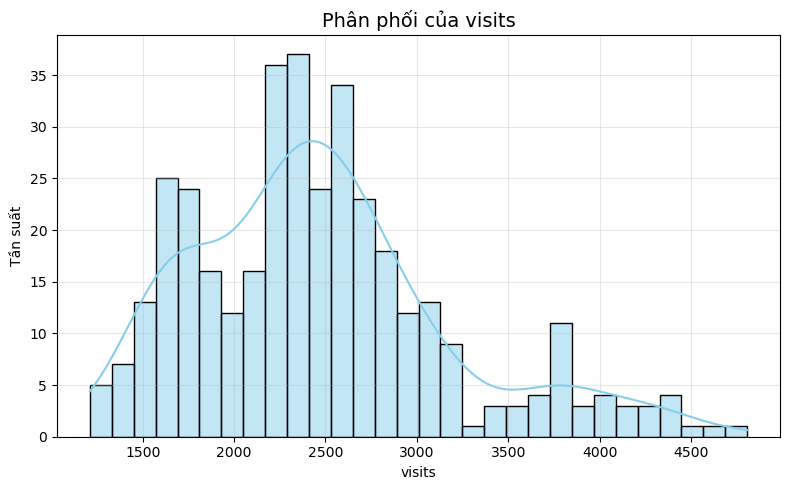

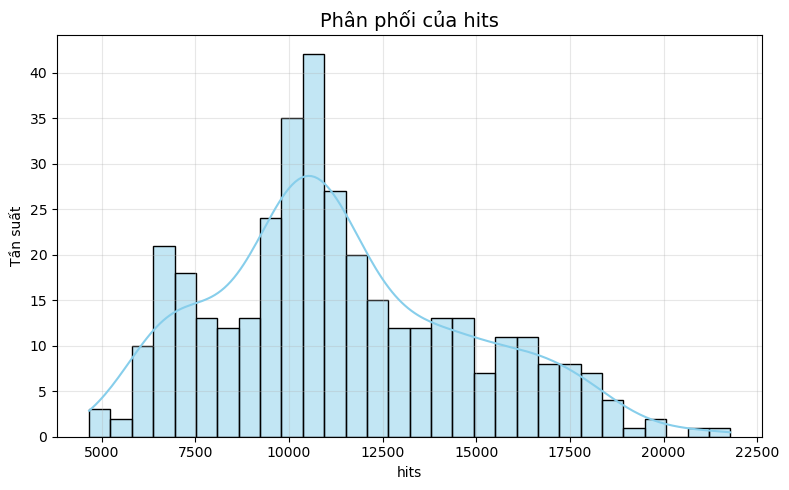

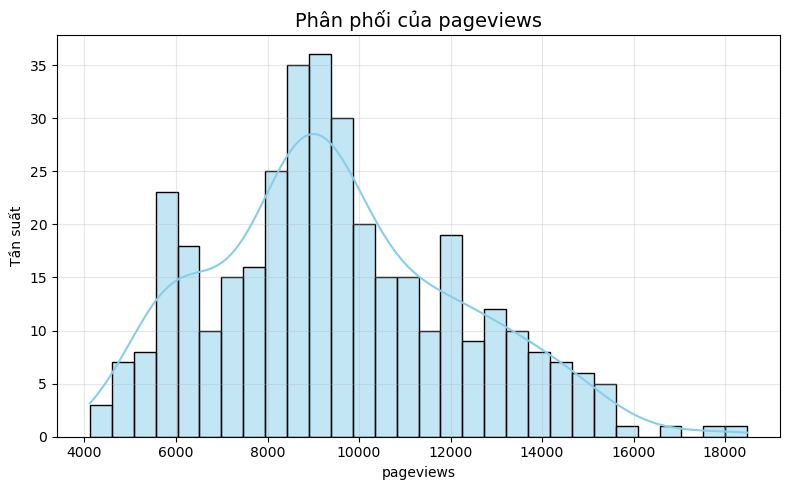

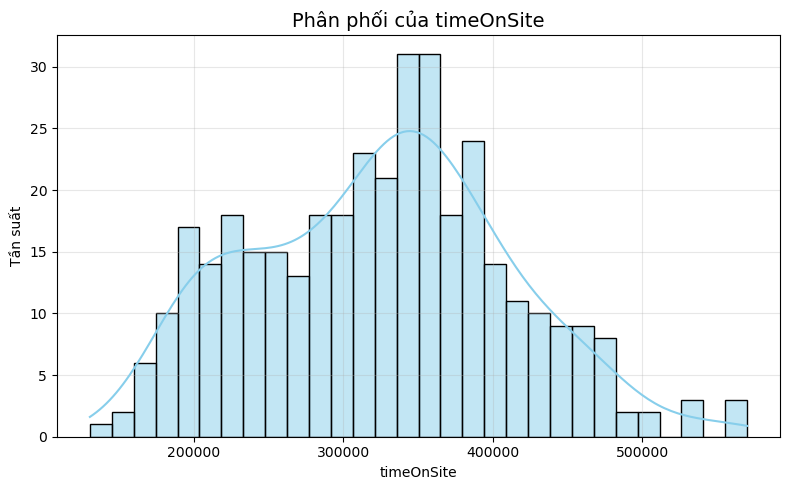

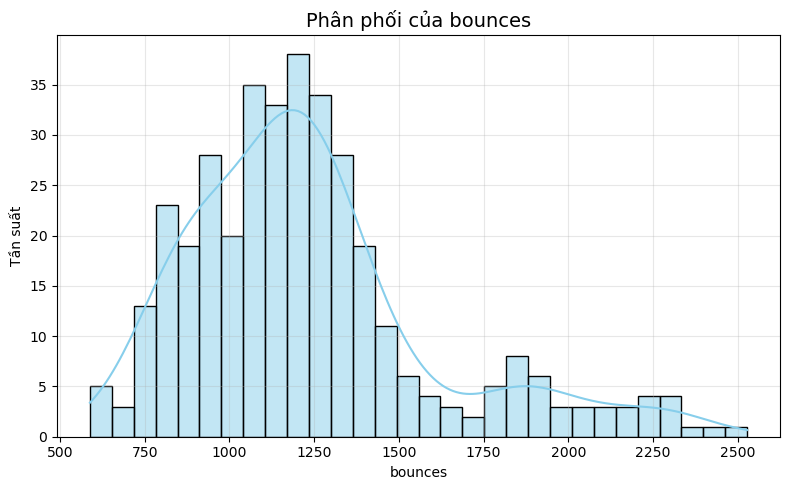

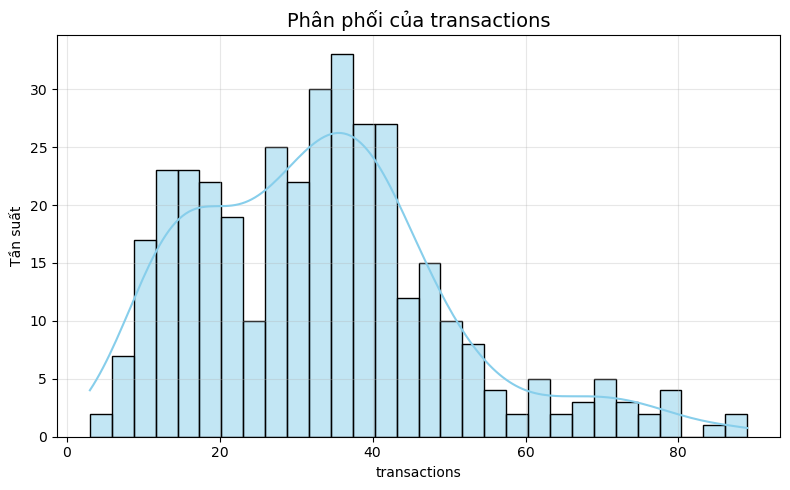

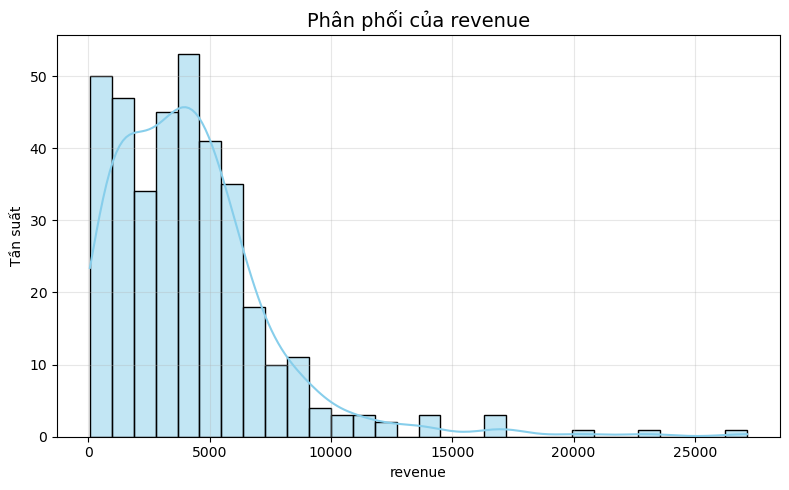

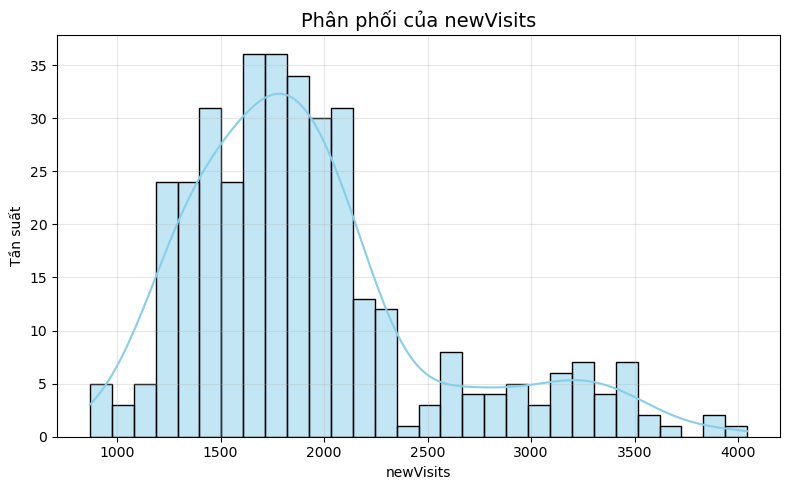

In [15]:
df = df.copy()  # tránh cảnh báo PerformanceWarning

# --- Danh sách các cột định lượng ---
numeric_cols = [
    "visits", "hits", "pageviews", "timeOnSite",
    "bounces", "transactions", "revenue", "newVisits"
]

import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x=col,
        bins=30,
        color="skyblue",
        edgecolor="black",
        kde=True  # thêm đường mật độ mượt
    )
    plt.title(f'Phân phối của {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


In [16]:
query = """
SELECT
  PARSE_DATE('%Y%m%d', date) AS Date,
  fullVisitorId,
  visitId,
  channelGrouping,
  socialEngagementType,
  device.browser AS `Device Browser`,
  device.operatingSystem AS `Device Operating System`,
  device.deviceCategory AS `Device Category`,
  geoNetwork.continent AS continent,
  geoNetwork.country AS country,
  geoNetwork.city AS city,
  trafficSource.source AS source,
  trafficSource.medium AS medium,
  totals.visits,
  totals.hits,
  totals.pageviews,
  totals.timeOnSite,
  totals.bounces,
  totals.transactions,
  totals.transactionRevenue / 1e6 AS revenue,
  totals.newVisits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
LIMIT 5000
"""

# 3️⃣ Chạy query và lấy kết quả vào DataFrame
df = client.query(query).to_dataframe()

# 4️⃣ Xem trước dữ liệu
print(df.head())
print(df.columns)

         Date        fullVisitorId     visitId channelGrouping  \
0  2017-02-27  6730269892610367417  1488252188        Referral   
1  2017-02-27  1107175628768096576  1488242045  Organic Search   
2  2017-02-27  9810406814717823062  1488241358  Organic Search   
3  2017-02-27  0738603250513383829  1488210663  Organic Search   
4  2017-02-27   224030721103061114  1488184471  Organic Search   

   socialEngagementType Device Browser Device Operating System  \
0  Not Socially Engaged         Chrome               Macintosh   
1  Not Socially Engaged         Chrome                 Android   
2  Not Socially Engaged         Chrome               Macintosh   
3  Not Socially Engaged         Chrome                 Android   
4  Not Socially Engaged         Chrome               Macintosh   

  Device Category continent        country  ...    source   medium visits  \
0         desktop  Americas  United States  ...  (direct)   (none)      1   
1          mobile  Americas  United States  ...    g

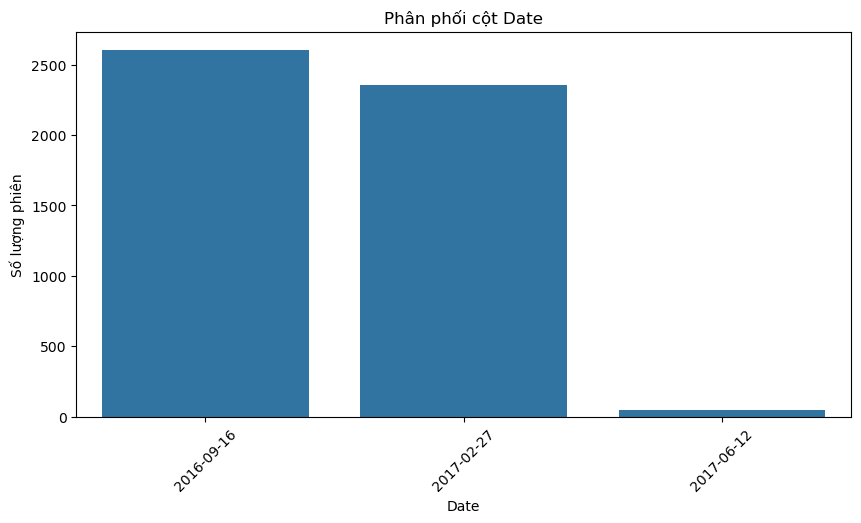

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chuyển cột Date về datetime nếu chưa
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Tạo cột tháng (Period)
df['month'] = df['Date'].dt.to_period('M')

# Tạo chuỗi tất cả các tháng từ 08/2016 đến 08/2017
all_months = pd.period_range('2016-08', '2017-08', freq='M')

# Đếm số phiên theo tháng
month_counts = df['month'].value_counts().sort_index()

# Reindex để điền 0 cho những tháng không có dữ liệu
month_counts = month_counts.reindex(all_months, fill_value=0)

categorical_col = ['Date']
# Vẽ bar chart
for col in categorical_col:
    if col in df.columns and df[col].nunique() <= 20:
        plt.figure(figsize=(10,5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Phân phối cột {col}')
        plt.ylabel('Số lượng phiên')
        plt.xlabel(col)
        plt.show()



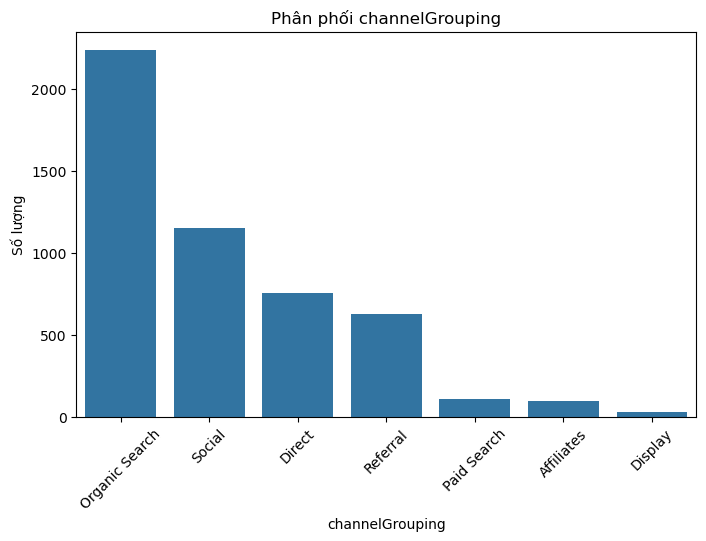

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channelGrouping', order=df['channelGrouping'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Phân phối channelGrouping')
plt.ylabel('Số lượng')
plt.xlabel('channelGrouping')
plt.show()


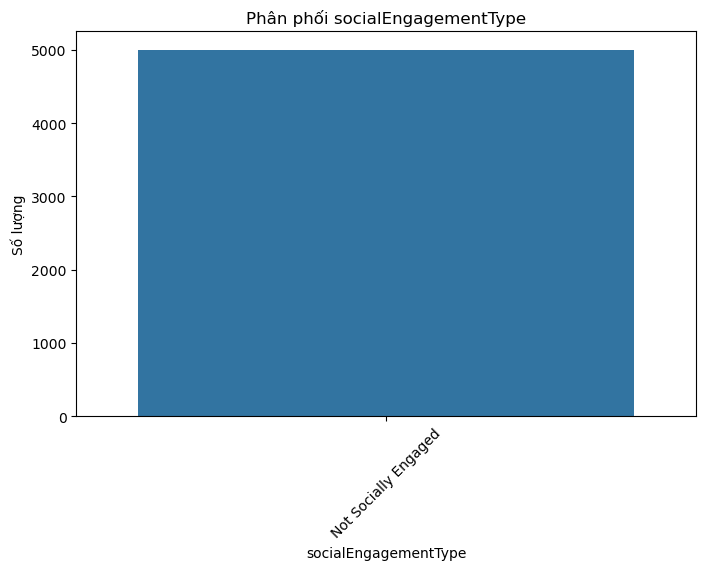

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='socialEngagementType', order=df['socialEngagementType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Phân phối socialEngagementType')
plt.ylabel('Số lượng')
plt.xlabel('socialEngagementType')
plt.show()


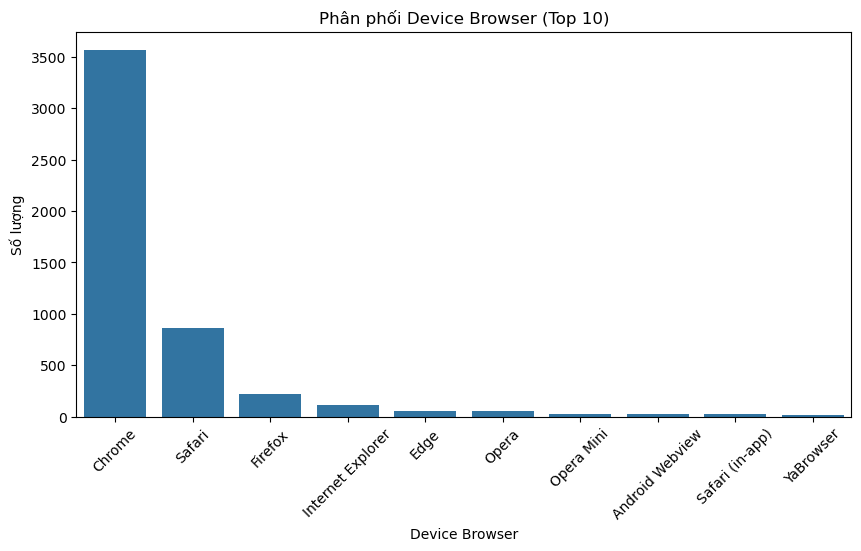

In [20]:
top10 = df['Device Browser'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Device Browser', order=top10)
plt.xticks(rotation=45)
plt.title('Phân phối Device Browser (Top 10)')
plt.ylabel('Số lượng')
plt.xlabel('Device Browser')
plt.show()


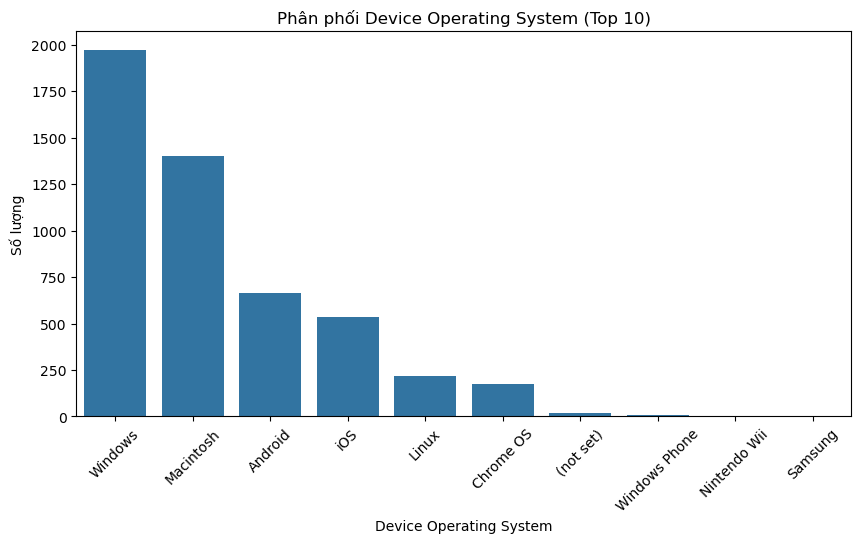

In [21]:
top10 = df['Device Operating System'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Device Operating System', order=top10)
plt.xticks(rotation=45)
plt.title('Phân phối Device Operating System (Top 10)')
plt.ylabel('Số lượng')
plt.xlabel('Device Operating System')
plt.show()


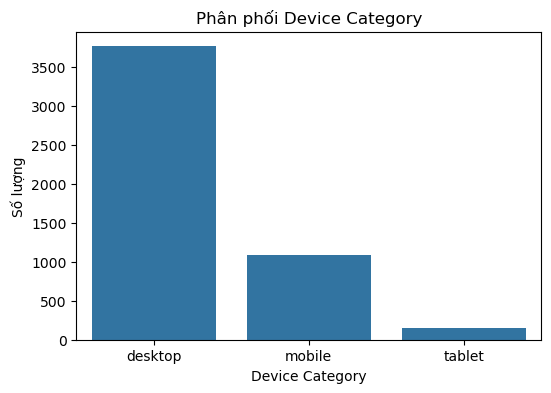

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Device Category', order=df['Device Category'].value_counts().index)
plt.title('Phân phối Device Category')
plt.ylabel('Số lượng')
plt.xlabel('Device Category')
plt.show()


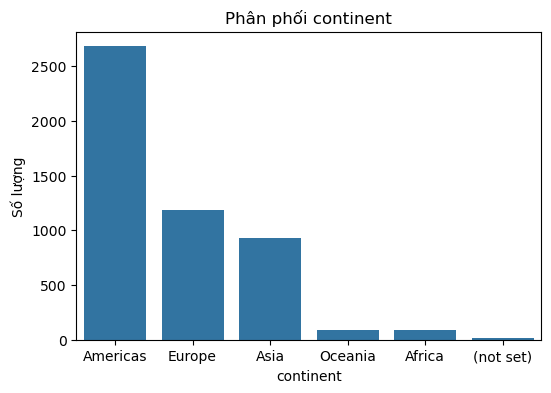

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='continent', order=df['continent'].value_counts().index)
plt.title('Phân phối continent')
plt.ylabel('Số lượng')
plt.xlabel('continent')
plt.show()


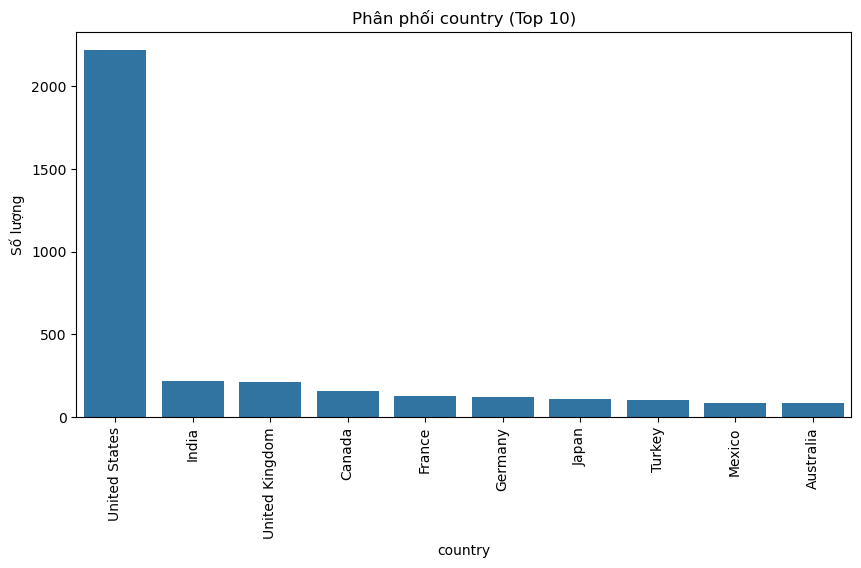

In [24]:
top10 = df['country'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='country', order=top10)
plt.xticks(rotation=90)
plt.title('Phân phối country (Top 10)')
plt.ylabel('Số lượng')
plt.xlabel('country')
plt.show()


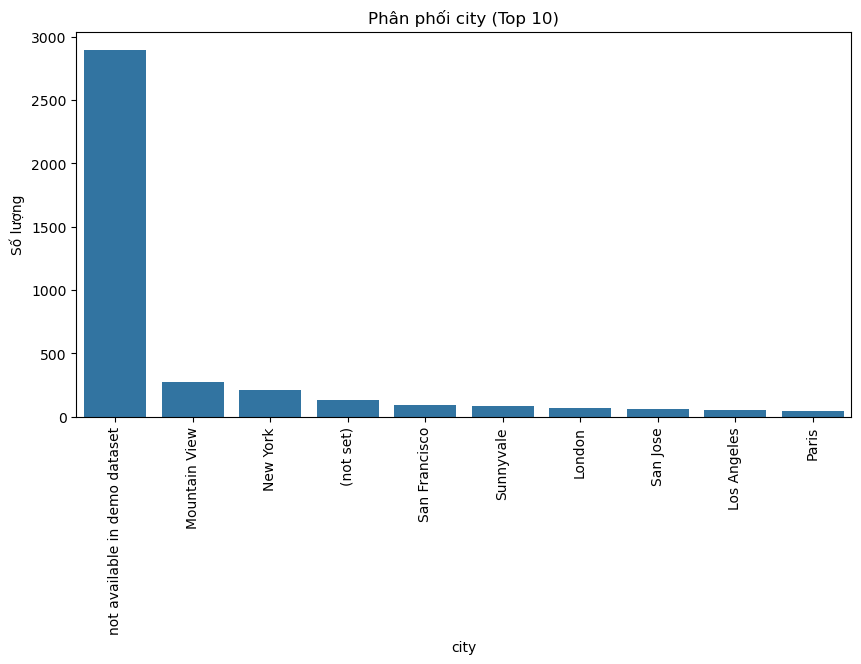

In [25]:
top10 = df['city'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='city', order=top10)
plt.xticks(rotation=90)
plt.title('Phân phối city (Top 10)')
plt.ylabel('Số lượng')
plt.xlabel('city')
plt.show()


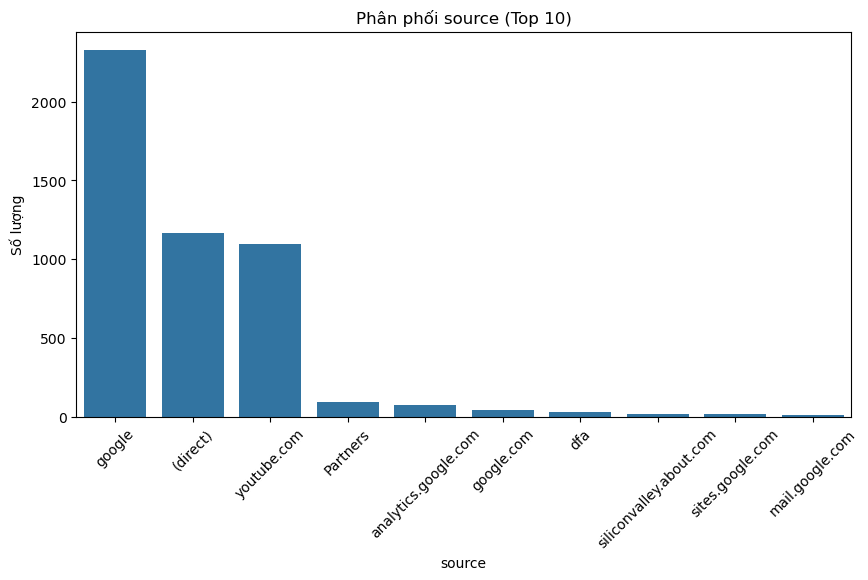

In [26]:
top10 = df['source'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='source', order=top10)
plt.xticks(rotation=45)
plt.title('Phân phối source (Top 10)')
plt.ylabel('Số lượng')
plt.xlabel('source')
plt.show()


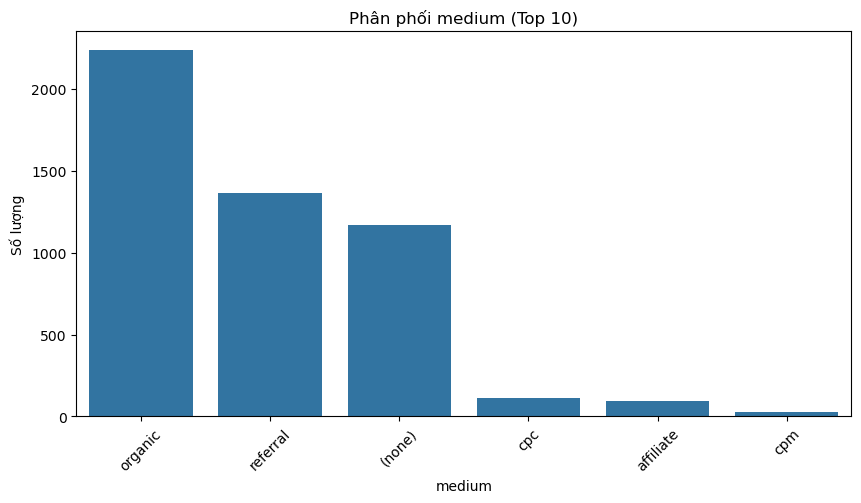

In [27]:
top10 = df['medium'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='medium', order=top10)
plt.xticks(rotation=45)
plt.title('Phân phối medium (Top 10)')
plt.ylabel('Số lượng')
plt.xlabel('medium')
plt.show()


In [28]:
print(f"Số lượng fullVisitorId duy nhất: {df['fullVisitorId'].nunique()}")


Số lượng fullVisitorId duy nhất: 4605


In [29]:
print(f"Số lượng visitId duy nhất: {df['visitId'].nunique()}")


Số lượng visitId duy nhất: 4911


In [30]:
### Tương quan
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Truy vấn các cột numeric để kiểm tra tương quan
query_corr = """
SELECT
  totals.visits AS visits,
  totals.hits AS hits,
  totals.pageviews AS pageviews,
  totals.timeOnSite AS timeOnSite,
  totals.bounces AS bounces,
  totals.transactions AS transactions,
  totals.transactionRevenue / 1e6 AS revenue,
  totals.newVisits AS newVisits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE totals.pageviews IS NOT NULL
AND totals.timeOnSite IS NOT NULL
LIMIT 100000;
"""

df = client.query(query_corr).to_dataframe()


In [32]:
print(df.columns)


Index(['visits', 'hits', 'pageviews', 'timeOnSite', 'bounces', 'transactions',
       'revenue', 'newVisits'],
      dtype='object')


In [33]:
numeric_cols = [
    'visits',
    'hits',
    'pageviews',
    'timeOnSite',
    'bounces',
    'transactions',
    'revenue',
    'newVisits'
]


In [34]:
df_numeric = df[numeric_cols]


In [49]:
corr_matrix = df_numeric.corr()
print(corr_matrix)

              visits      hits  pageviews  timeOnSite  bounces  transactions  \
visits           NaN       NaN        NaN         NaN      NaN           NaN   
hits             NaN  1.000000   0.980296    0.632026      NaN      0.479114   
pageviews        NaN  0.980296   1.000000    0.653935      NaN      0.547174   
timeOnSite       NaN  0.632026   0.653935    1.000000      NaN      0.316047   
bounces          NaN       NaN        NaN         NaN      NaN           NaN   
transactions     NaN  0.479114   0.547174    0.316047      NaN      1.000000   
revenue          NaN  0.161256   0.144670    0.134926      NaN      0.037930   
newVisits        NaN       NaN        NaN         NaN      NaN           NaN   

               revenue  newVisits  
visits             NaN        NaN  
hits          0.161256        NaN  
pageviews     0.144670        NaN  
timeOnSite    0.134926        NaN  
bounces            NaN        NaN  
transactions  0.037930        NaN  
revenue       1.000000     

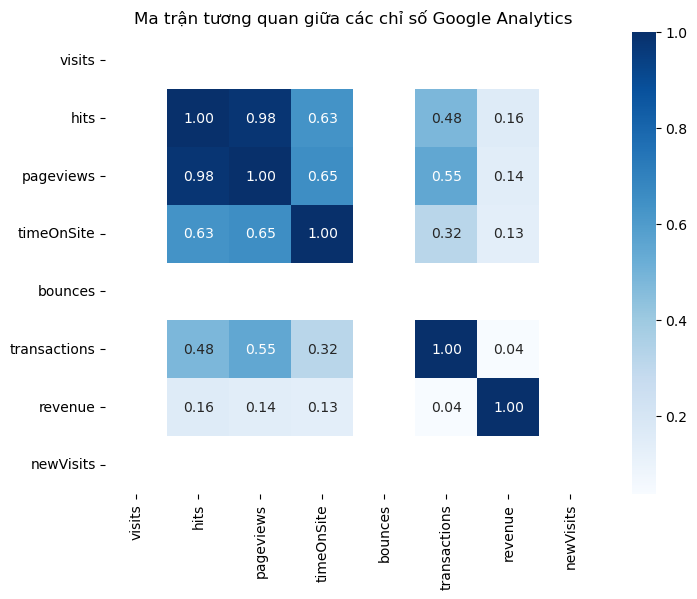

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Ma trận tương quan giữa các chỉ số Google Analytics")
plt.show()



In [69]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.precision', 2)

corr_matrix = df_numeric.corr()
print("🔹 Ma trận tương quan giữa các biến định lượng:\n")
print(corr_matrix)


🔹 Ma trận tương quan giữa các biến định lượng:

              visits  hits  pageviews  timeOnSite  bounces  transactions  revenue  newVisits
visits           NaN   NaN        NaN         NaN      NaN           NaN      NaN        NaN
hits             NaN  1.00       0.98        0.63      NaN          0.48     0.16        NaN
pageviews        NaN  0.98       1.00        0.65      NaN          0.55     0.14        NaN
timeOnSite       NaN  0.63       0.65        1.00      NaN          0.32     0.13        NaN
bounces          NaN   NaN        NaN         NaN      NaN           NaN      NaN        NaN
transactions     NaN  0.48       0.55        0.32      NaN          1.00     0.04        NaN
revenue          NaN  0.16       0.14        0.13      NaN          0.04     1.00        NaN
newVisits        NaN   NaN        NaN         NaN      NaN           NaN      NaN        NaN


C:\Users\minhn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


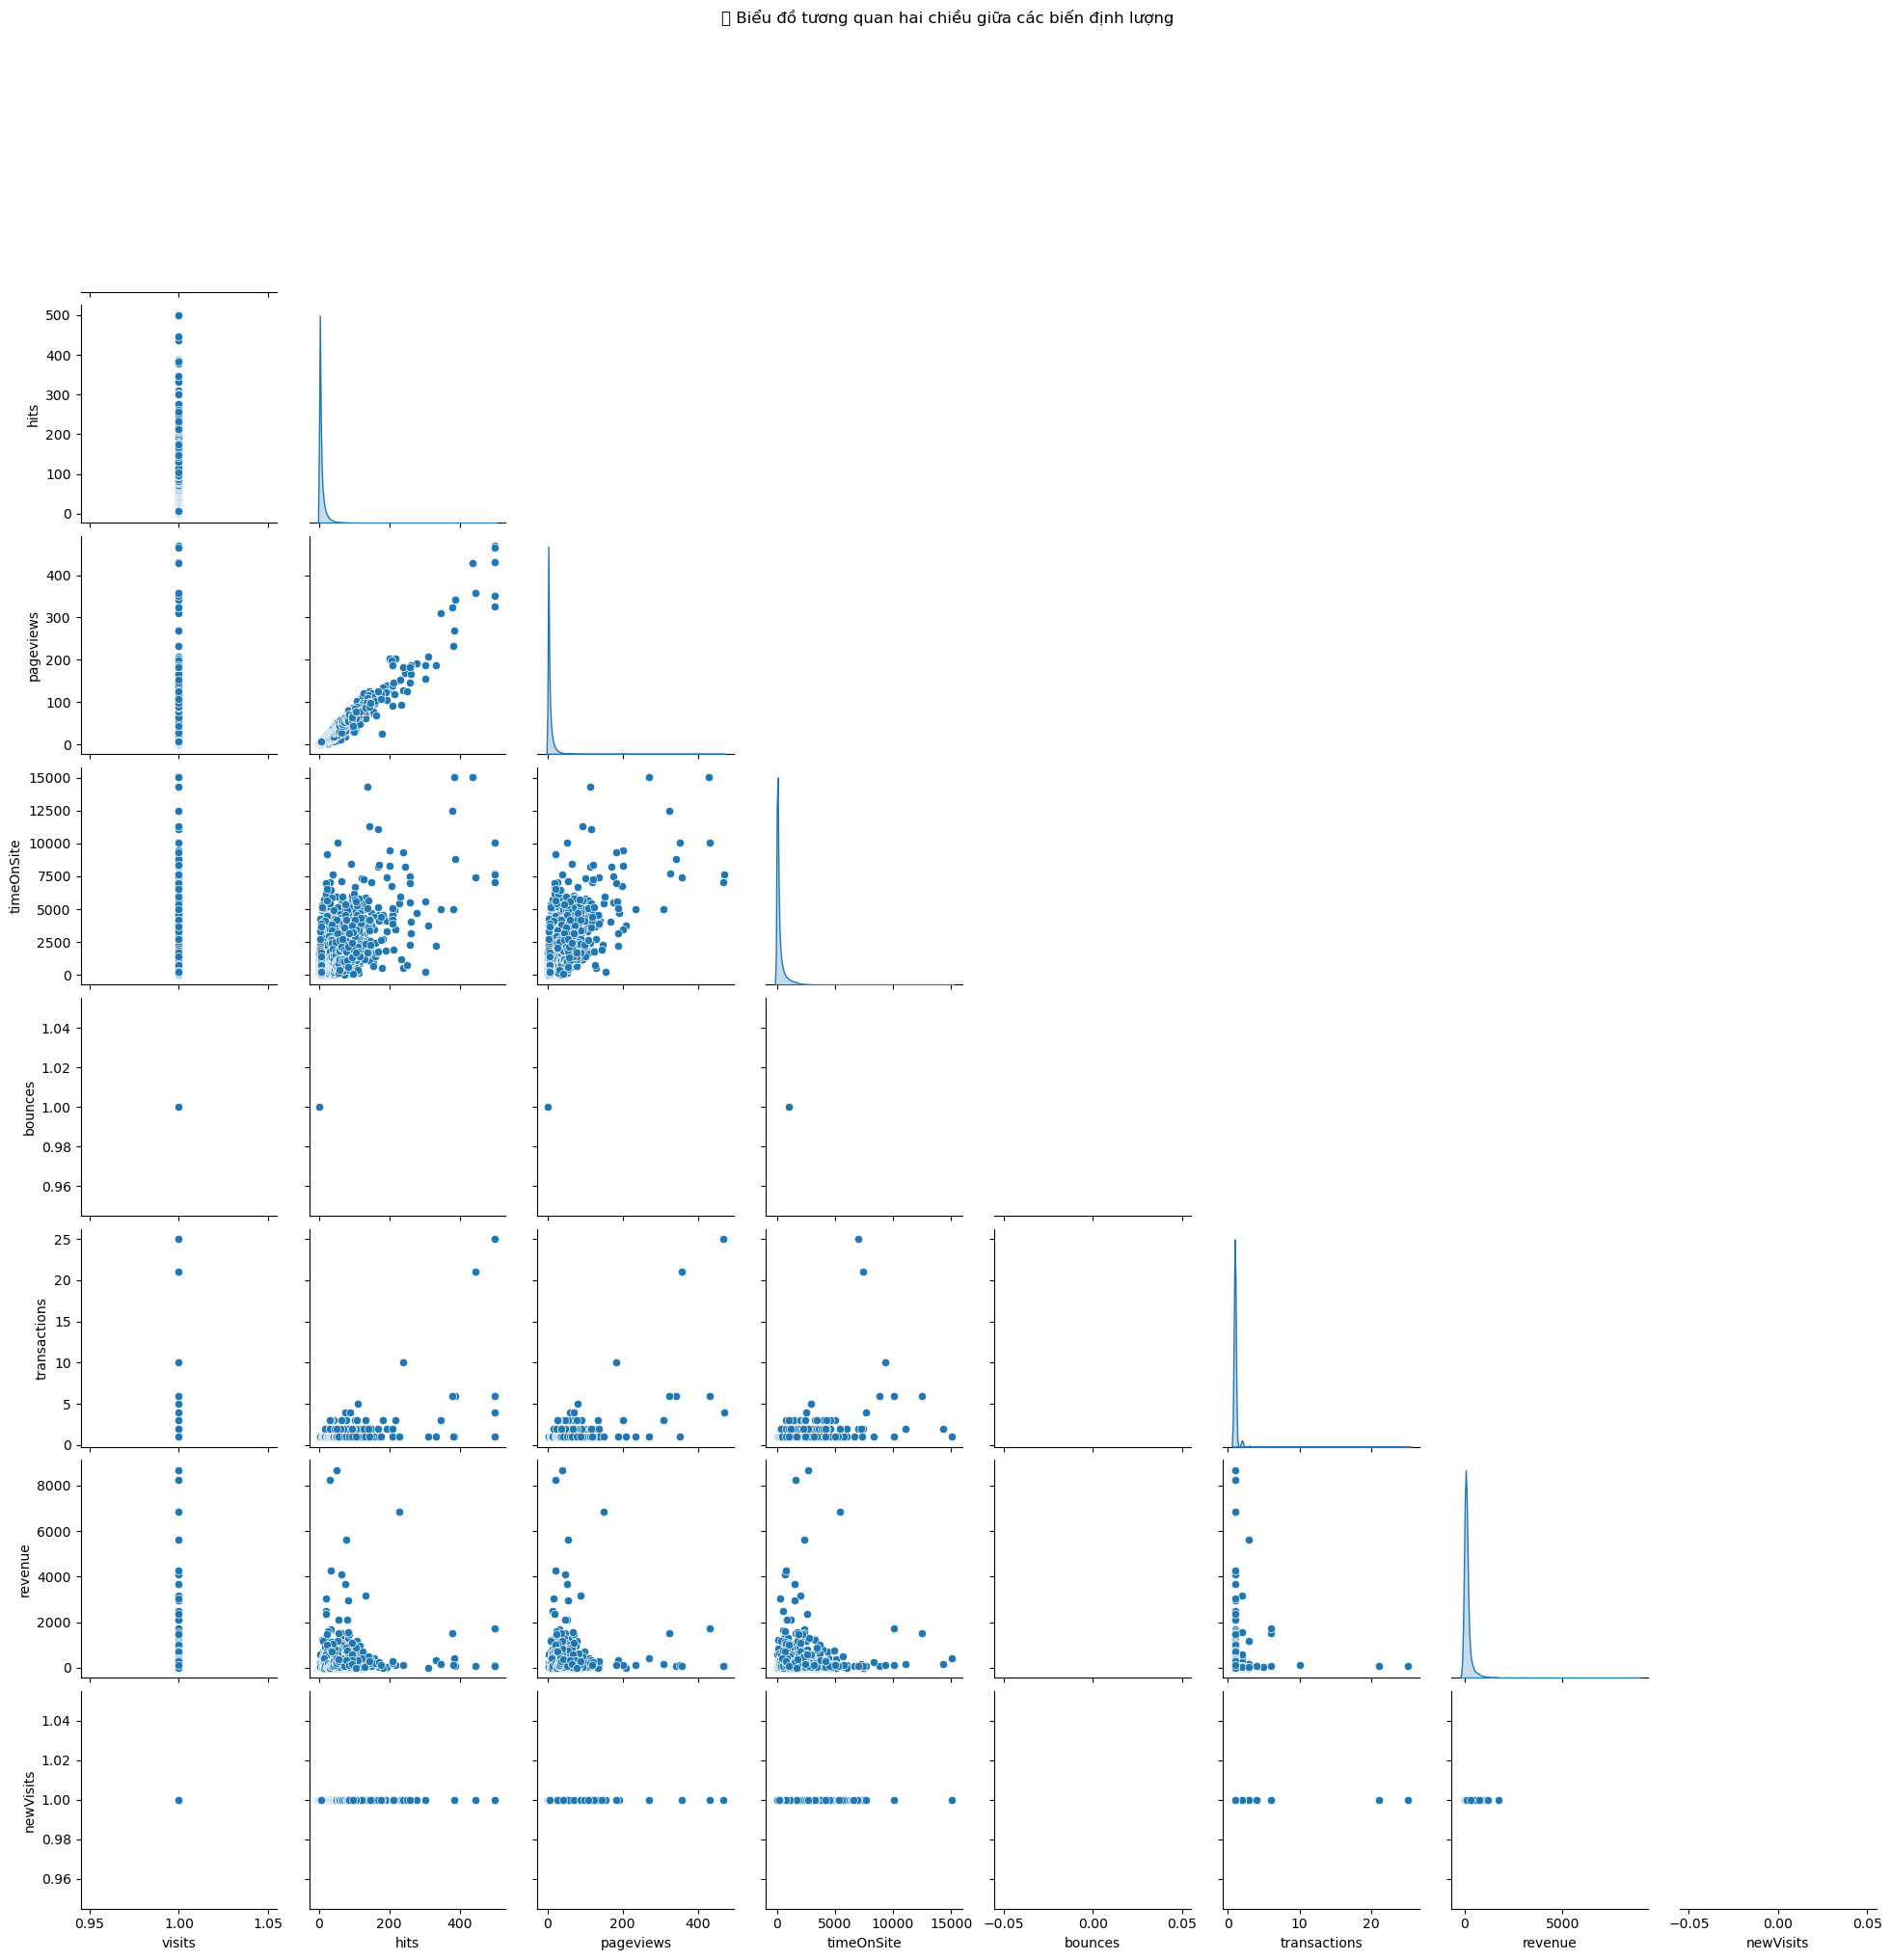

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['visits', 'hits', 'pageviews', 'timeOnSite',
                'bounces', 'transactions', 'revenue', 'newVisits']

# Vẽ ma trận scatter (pairplot)
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('🔹 Biểu đồ tương quan hai chiều giữa các biến định lượng', y=1.02)
plt.show()


Tương quan (r) giữa hits và pageviews: 0.980


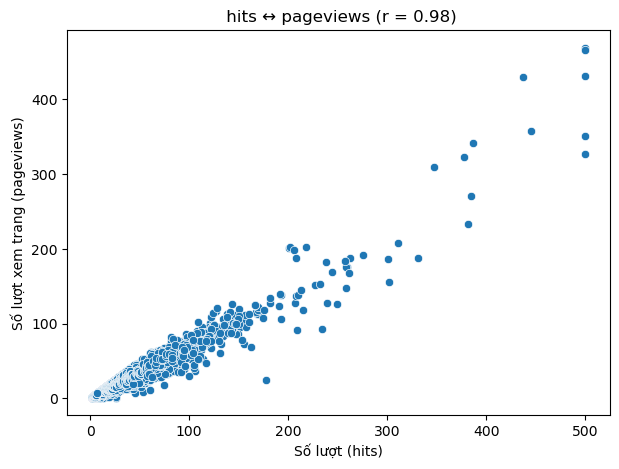

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

r = df['hits'].corr(df['pageviews'])
print(f"Tương quan (r) giữa hits và pageviews: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='hits', y='pageviews', data=df)
plt.title(f' hits ↔ pageviews (r = {r:.2f})')
plt.xlabel('Số lượt (hits)')
plt.ylabel('Số lượt xem trang (pageviews)')
plt.show()


Tương quan (r) giữa transactions và hits: 0.479


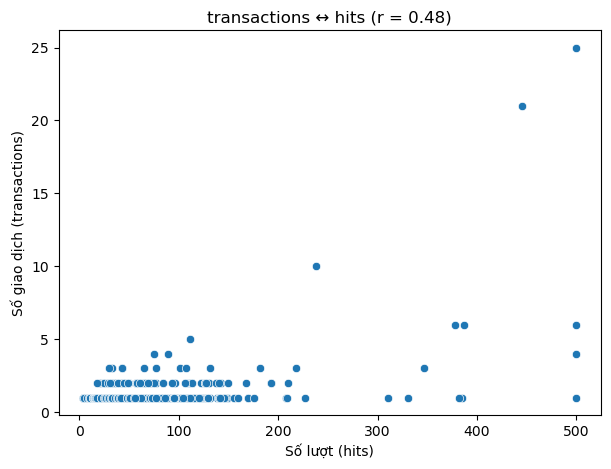

In [63]:
r = df['transactions'].corr(df['hits'])
print(f"Tương quan (r) giữa transactions và hits: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='hits', y='transactions', data=df)
plt.title(f'transactions ↔ hits (r = {r:.2f})')
plt.xlabel('Số lượt (hits)')
plt.ylabel('Số giao dịch (transactions)')
plt.show()


Tương quan (r) giữa transactions và pageviews: 0.547


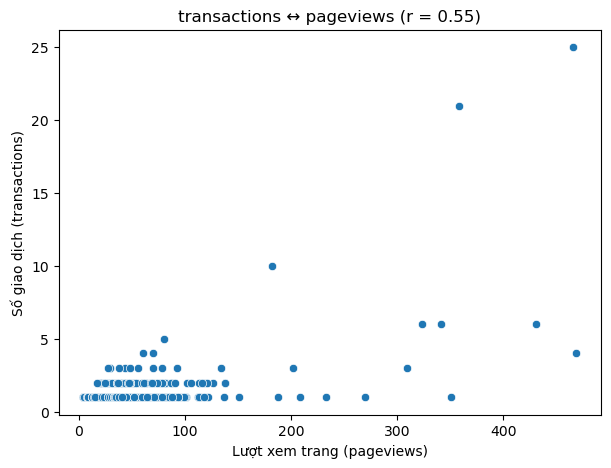

In [65]:
r = df['transactions'].corr(df['pageviews'])
print(f"Tương quan (r) giữa transactions và pageviews: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='pageviews', y='transactions', data=df)
plt.title(f'transactions ↔ pageviews (r = {r:.2f})')
plt.xlabel('Lượt xem trang (pageviews)')
plt.ylabel('Số giao dịch (transactions)')
plt.show()


Tương quan (r) giữa timeOnSite và hits: 0.616


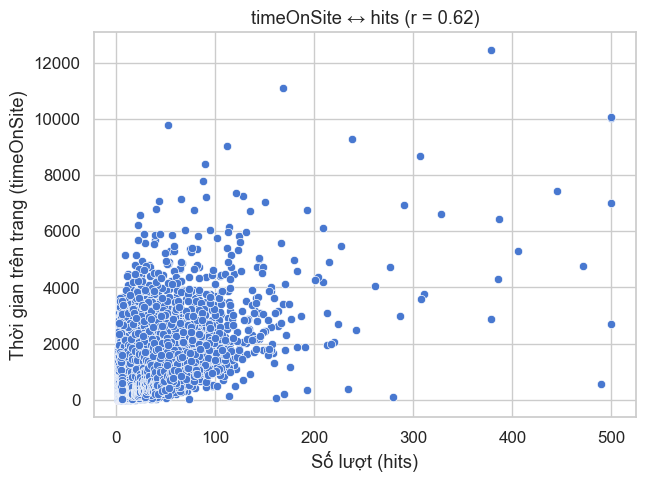

In [84]:
r = df['timeOnSite'].corr(df['hits'])
print(f"Tương quan (r) giữa timeOnSite và hits: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='hits', y='timeOnSite', data=df)
plt.title(f'timeOnSite ↔ hits (r = {r:.2f})')
plt.xlabel('Số lượt (hits)')
plt.ylabel('Thời gian trên trang (timeOnSite)')
plt.show()


Tương quan (r) giữa timeOnSite và pageviews: 0.645


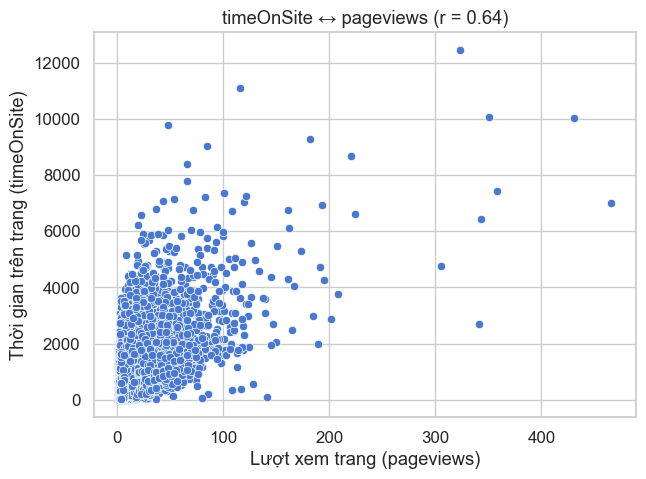

In [86]:
r = df['timeOnSite'].corr(df['pageviews'])
print(f"Tương quan (r) giữa timeOnSite và pageviews: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='pageviews', y='timeOnSite', data=df)
plt.title(f'timeOnSite ↔ pageviews (r = {r:.2f})')
plt.xlabel('Lượt xem trang (pageviews)')
plt.ylabel('Thời gian trên trang (timeOnSite)')
plt.show()


Tương quan (r) giữa timeOnSite và transactions: 0.333


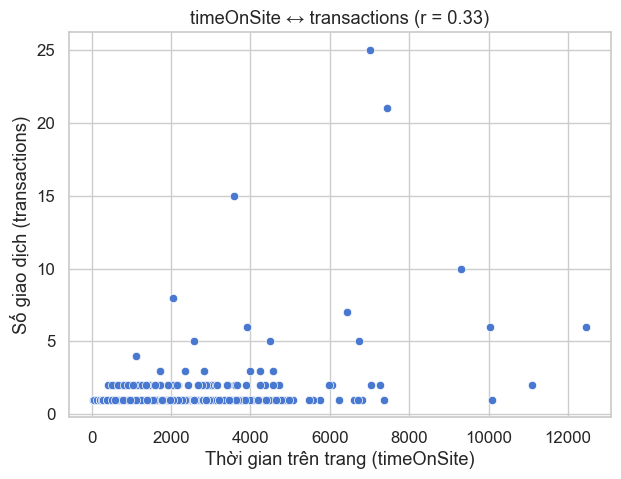

In [88]:
r = df['timeOnSite'].corr(df['transactions'])
print(f"Tương quan (r) giữa timeOnSite và transactions: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='timeOnSite', y='transactions', data=df)
plt.title(f'timeOnSite ↔ transactions (r = {r:.2f})')
plt.xlabel('Thời gian trên trang (timeOnSite)')
plt.ylabel('Số giao dịch (transactions)')
plt.show()


Tương quan (r) giữa revenue và transactions: 0.052


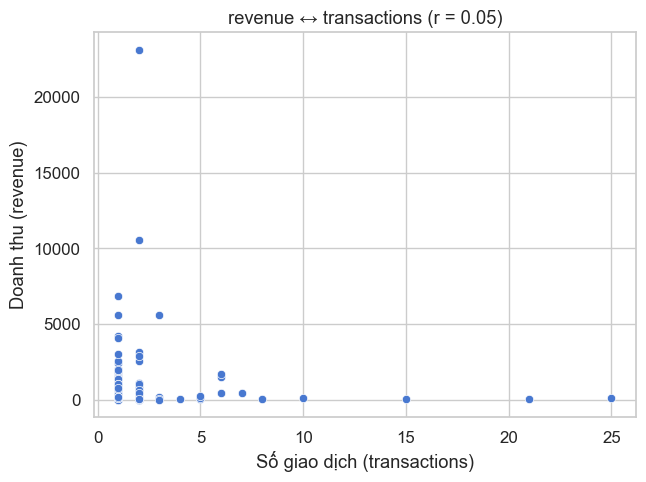

In [90]:
r = df['revenue'].corr(df['transactions'])
print(f"Tương quan (r) giữa revenue và transactions: {r:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(x='transactions', y='revenue', data=df)
plt.title(f'revenue ↔ transactions (r = {r:.2f})')
plt.xlabel('Số giao dịch (transactions)')
plt.ylabel('Doanh thu (revenue)')
plt.show()


## Bảng daily_total_visits

In [21]:
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.daily_total_visits`
"""

# Chạy truy vấn và tải dữ liệu vào DataFrame
df = client.query(query).to_dataframe()

# Kiểm tra số lượng giá trị null cho từng cột
print(df.isnull().sum())

# Kiểm tra tỷ lệ % giá trị null
print((df.isnull().mean() * 100).round(2))

visit_date      0
total_visits    0
dtype: int64
visit_date      0.0
total_visits    0.0
dtype: float64


In [23]:
query = """
SELECT
  COUNT(*) AS total_rows,
  MIN(total_visits) AS min_visits,
  MAX(total_visits) AS max_visits,
  AVG(total_visits) AS avg_visits,
  COUNTIF(total_visits IS NULL) AS missing_visits
FROM `bigquery-public-data.google_analytics_sample.daily_total_visits`;
"""

# Chạy truy vấn và lấy kết quả
df_summary = client.query(query).to_dataframe()

# Hiển thị kết quả
print(df_summary)

   total_rows  min_visits  max_visits   avg_visits  missing_visits
0         366        1211        4807  2468.997268               0


In [24]:
query = """
SELECT
  COUNT(*) AS total_rows,
  MIN(total_visits) AS min_visits,
  MAX(total_visits) AS max_visits,
  AVG(total_visits) AS avg_visits,
  STDDEV(total_visits) AS stddev_visits,
  COUNTIF(total_visits IS NULL) AS missing_visits,
  APPROX_QUANTILES(total_visits, 100)[OFFSET(50)] AS median_visits
FROM `bigquery-public-data.google_analytics_sample.daily_total_visits`;
"""

df_summary = client.query(query).to_dataframe()
print(df_summary)


   total_rows  min_visits  max_visits   avg_visits  stddev_visits  \
0         366        1211        4807  2468.997268     707.730622   

   missing_visits  median_visits  
0               0           2391  


In [25]:
print(df.columns)


Index(['visit_date', 'total_visits'], dtype='object')


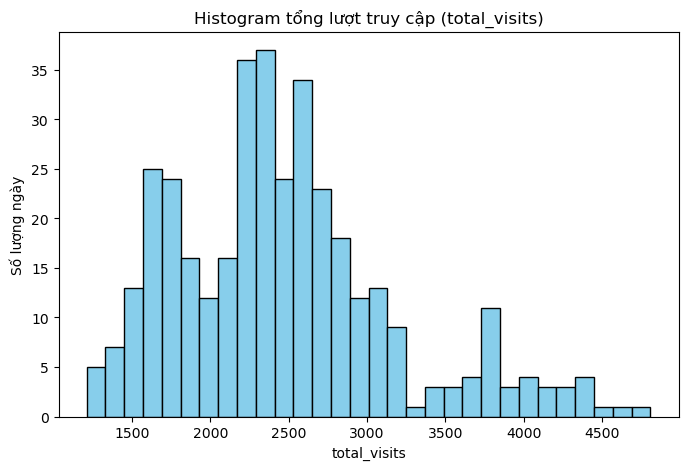

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['total_visits'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram tổng lượt truy cập (total_visits)")
plt.xlabel("total_visits")
plt.ylabel("Số lượng ngày")
plt.show()


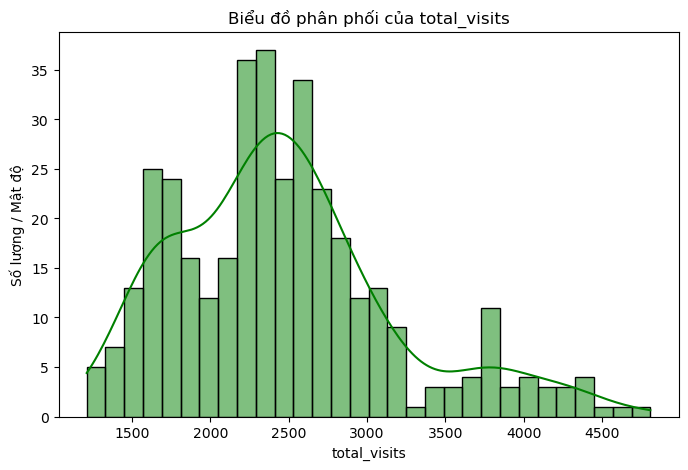

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['total_visits'], bins=30, kde=True, color='green')
plt.title("Biểu đồ phân phối của total_visits")
plt.xlabel("total_visits")
plt.ylabel("Số lượng / Mật độ")
plt.show()


## Bảng daily_visits

In [197]:
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.daily_visits`
"""

# Chạy truy vấn và tải dữ liệu vào DataFrame
df = client.query(query).to_dataframe()

# Kiểm tra số lượng giá trị null cho từng cột
print(df.isnull().sum())

# Kiểm tra tỷ lệ % giá trị null
print((df.isnull().mean() * 100).round(2))

visit_date      0
total_visits    0
dtype: int64
visit_date      0.0
total_visits    0.0
dtype: float64


In [201]:
query = """
SELECT
  COUNT(*) AS total_rows,
  MIN(total_visits) AS min_visits,
  MAX(total_visits) AS max_visits,
  AVG(total_visits) AS avg_visits,
  COUNTIF(total_visits IS NULL) AS missing_visits
FROM `bigquery-public-data.google_analytics_sample.daily_visits`;
"""

# Chạy truy vấn và lấy kết quả
df_summary = client.query(query).to_dataframe()

# Hiển thị kết quả
print(df_summary)

   total_rows  min_visits  max_visits   avg_visits  missing_visits
0         367         638        4698  2462.269755               0


In [34]:
query = """
SELECT
  COUNT(*) AS total_rows,
  MIN(total_visits) AS min_visits,
  MAX(total_visits) AS max_visits,
  AVG(total_visits) AS avg_visits,
  STDDEV(total_visits) AS stddev_visits,
  COUNTIF(total_visits IS NULL) AS missing_visits,
  APPROX_QUANTILES(total_visits, 100)[OFFSET(50)] AS median_visits
FROM `bigquery-public-data.google_analytics_sample.daily_visits`;
"""

df_summary = client.query(query).to_dataframe()
print(df_summary)


   total_rows  min_visits  max_visits   avg_visits  stddev_visits  \
0         367         638        4698  2462.269755     712.279712   

   missing_visits  median_visits  
0               0           2396  


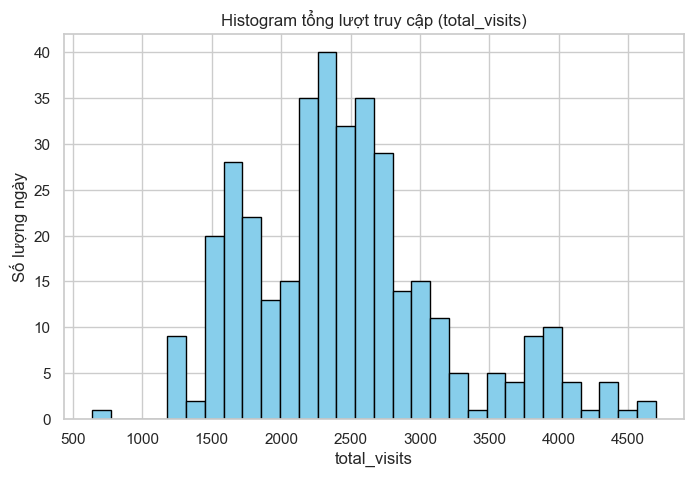

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['total_visits'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram tổng lượt truy cập (total_visits)")
plt.xlabel("total_visits")
plt.ylabel("Số lượng ngày")
plt.show()


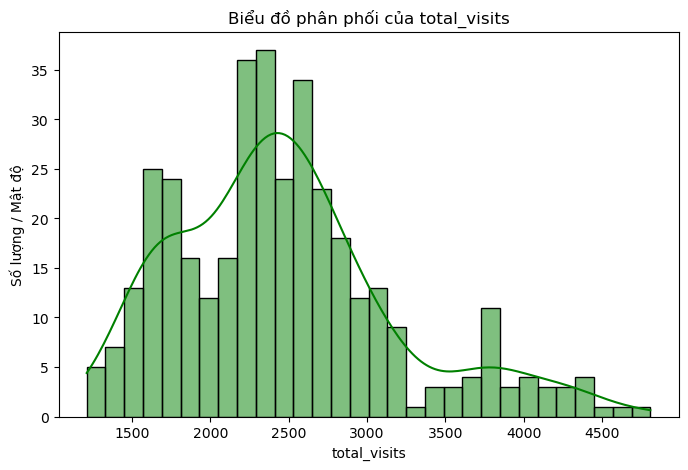

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_visits'], bins=30, kde=True, color='green')
plt.title("Biểu đồ phân phối của total_visits")
plt.xlabel("total_visits")
plt.ylabel("Số lượng / Mật độ")
plt.show()


## Xử lý dữ liệu

In [73]:
from google.cloud import bigquery
import pandas as pd
# Lấy dữ liệu mẫu từ bảng ga_sessions_*
query = """
SELECT
  totals.pageviews,
  totals.timeOnSite,
  totals.transactions,
  totals.transactionRevenue,
  totals.newVisits
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
"""
df = client.query(query).to_dataframe()
print("Số dòng dữ liệu:", len(df))
print(df.head())


Số dòng dữ liệu: 903653
   pageviews  timeOnSite  transactions  transactionRevenue  newVisits
0          1        <NA>          <NA>                <NA>       <NA>
1          1          28          <NA>                <NA>          1
2          1          22          <NA>                <NA>          1
3          1          35          <NA>                <NA>          1
4          1          33          <NA>                <NA>          1


In [42]:
query = """
SELECT
  fullVisitorId,
  visitId,
  visitNumber,
  date,
  visitStartTime,
  channelGrouping,
  socialEngagementType,
  device.browser AS browser,
  device.operatingSystem AS operatingSystem,
  device.deviceCategory AS deviceCategory,
  geoNetwork.continent AS continent,
  geoNetwork.country AS country,
  geoNetwork.city AS city,
  trafficSource.source AS source,
  trafficSource.medium AS medium,
  totals.visits AS visits,
  totals.hits AS hits,
  totals.pageviews AS pageviews,
  totals.timeOnSite AS timeOnSite,
  totals.bounces AS bounces,
  totals.transactions AS transactions,
  totals.transactionRevenue / 1000000 AS transactionRevenue,
  totals.newVisits AS newVisits
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
"""

job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)
query_job = client.query(query, job_config=job_config)
print(f"Bytes processed: {query_job.total_bytes_processed / 1e9:.2f} GB")

df = client.query(query).to_dataframe()
print(df.shape)


Bytes processed: 0.19 GB
(903653, 23)


In [44]:
print(df.head())

         fullVisitorId     visitId  visitNumber      date  visitStartTime  \
0   466407106211662235  1500418942            1  20170718      1500418942   
1  7951853099129155820  1500392606            1  20170718      1500392606   
2  6400178996598013044  1500413465            2  20170718      1500413465   
3  3141212643703447282  1500410012            2  20170718      1500410012   
4  4295157200398275477  1500443360            1  20170718      1500443360   

  channelGrouping  socialEngagementType browser operatingSystem  \
0  Organic Search  Not Socially Engaged  Chrome         Android   
1          Direct  Not Socially Engaged  Safari             iOS   
2        Referral  Not Socially Engaged  Chrome       Macintosh   
3  Organic Search  Not Socially Engaged  Chrome       Macintosh   
4  Organic Search  Not Socially Engaged  Chrome         Windows   

  deviceCategory  ...    source   medium visits hits pageviews  timeOnSite  \
0         mobile  ...    google  organic      1   17    

In [46]:
import pandas as pd
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d", errors="coerce")


In [48]:
cols_numeric = [
    "visits", "hits", "pageviews", "timeOnSite",
    "bounces", "transactions", "transactionRevenue", "newVisits"
]

cols_categorical = [
    "channelGrouping", "socialEngagementType", "browser",
    "operatingSystem", "deviceCategory", "continent",
    "country", "city", "source", "medium"
]


In [50]:
df[cols_numeric] = df[cols_numeric].fillna(df[cols_numeric].median())


In [52]:
df[cols_categorical] = df[cols_categorical].fillna("Unknown")


In [54]:
df = df[df["transactionRevenue"] < 1_000_000]


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[cols_numeric] = scaler.fit_transform(df[cols_numeric])


In [58]:
df_encoded = pd.get_dummies(df, columns=cols_categorical, drop_first=True)


In [70]:
print(df.describe())
df.sample(50)


                 visitId  visitNumber                           date  \
count           903653.0     903653.0                         903653   
mean   1485007289.064562     2.264897  2017-01-20 18:54:58.635205632   
min         1470034812.0          1.0            2016-08-01 00:00:00   
25%         1477561169.0          1.0            2016-10-27 00:00:00   
50%         1483948658.0          1.0            2017-01-09 00:00:00   
75%         1492758762.0          1.0            2017-04-21 00:00:00   
max         1501657193.0        395.0            2017-08-01 00:00:00   
std       9022123.556191     9.283735                            NaN   

          visitStartTime    visits          hits     pageviews    timeOnSite  \
count           903653.0  903653.0  9.036530e+05  9.036530e+05  9.036530e+05   
mean   1485007290.059528       0.0  5.736848e-17  1.374453e-17  5.784026e-17   
min         1470034812.0       0.0 -3.730294e-01 -4.056187e-01 -4.841578e-01   
25%         1477561169.0       

,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,...,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
574498,6400433973584974587,1487340706,1,2017-02-17,1487340706,Social,Not Socially Engaged,Chrome,Android,mobile,...,youtube.com,referral,0.0,-0.373029,-0.405619,-0.253096,0.0,-0.012033,-0.020866,0.0
901932,6346347026791987272,1491264551,2,2017-04-03,1491264551,Organic Search,Not Socially Engaged,Chrome,Windows,desktop,...,google,organic,0.0,0.041847,0.021431,0.262567,0.0,-0.012033,-0.020866,0.0
407529,4316965855025862070,1470713879,1,2016-08-08,1470713879,Organic Search,Not Socially Engaged,Chrome,Windows,desktop,...,baidu,organic,0.0,-0.373029,-0.405619,-0.253096,0.0,-0.012033,-0.020866,0.0
436244,541060058304409535,1486561627,2,2017-02-08,1486561627,Organic Search,Not Socially Engaged,Safari,iOS,mobile,...,(direct),(none),0.0,0.664161,0.733180,0.721873,0.0,-0.012033,-0.020866,0.0
592163,4520104360591411292,1476470316,1,2016-10-14,1476470316,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,...,(direct),(none),0.0,3.879451,3.437828,1.801101,0.0,-0.012033,-0.020866,0.0
754825,0735577190212190781,1471031259,1,2016-08-12,1471031259,Referral,Not Socially Engaged,Chrome,Windows,desktop,...,(direct),(none),0.0,0.664161,0.875530,0.048412,0.0,-0.012033,-0.020866,0.0
869509,3000884824240505827,1474486749,1,2016-09-21,1474486749,Social,Not Socially Engaged,Chrome,Windows,desktop,...,youtube.com,referral,0.0,-0.269310,-0.263269,-0.346084,0.0,-0.012033,-0.020866,0.0
757751,5721776556276187807,1501073612,2,2017-07-26,1501073612,Organic Search,Not Socially Engaged,Chrome,Android,mobile,...,google,organic,0.0,-0.373029,-0.405619,-0.253096,0.0,-0.012033,-0.020866,0.0
840430,9529350436031318974,1475249120,1,2016-09-30,1475249120,Organic Search,Not Socially Engaged,Chrome,Chrome OS,desktop,...,(direct),(none),0.0,-0.373029,-0.405619,-0.253096,0.0,-0.012033,-0.020866,0.0
716898,5455936842796582293,1491341914,1,2017-04-04,1491341914,Social,Not Socially Engaged,Chrome,Windows,desktop,...,youtube.com,referral,0.0,-0.373029,-0.405619,-0.253096,0.0,-0.012033,-0.020866,0.0


In [90]:
import pandas as pd

# 1️⃣ Chuyển timestamp sang UTC (có timezone)
ts = pd.to_datetime(1486561627, unit='s', utc=True)

# 2️⃣ Đổi từ UTC sang múi giờ Việt Nam
ts_vn = ts.tz_convert('Asia/Ho_Chi_Minh')

print(ts_vn)


2017-02-08 20:47:07+07:00


In [120]:
print(df.shape)
df.head()


(903653, 23)


,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,...,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,466407106211662235,1500418942,1,2017-07-18,1500418942,Organic Search,Not Socially Engaged,Chrome,Android,mobile,...,google,organic,0.0,1.286475,1.30258,1.668663,0.0,-0.012033,-0.020866,0.0
1,7951853099129155820,1500392606,1,2017-07-18,1500392606,Direct,Not Socially Engaged,Safari,iOS,mobile,...,(direct),(none),0.0,1.286475,1.30258,1.012109,0.0,-0.012033,-0.020866,0.0
2,6400178996598013044,1500413465,2,2017-07-18,1500413465,Referral,Not Socially Engaged,Chrome,Macintosh,desktop,...,(direct),(none),0.0,1.286475,1.44493,2.936686,0.0,-0.012033,-0.204830,0.0
3,3141212643703447282,1500410012,2,2017-07-18,1500410012,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,...,google,organic,0.0,1.286475,0.87553,-0.270003,0.0,-0.012033,-0.020866,0.0
4,4295157200398275477,1500443360,1,2017-07-18,1500443360,Organic Search,Not Socially Engaged,Chrome,Windows,desktop,...,google,organic,0.0,1.286475,1.16023,1.440419,0.0,-0.012033,-0.020866,0.0


In [124]:
df.to_csv("clean_ga_sessions.csv", index=False)


In [126]:
import pandas as pd

# Đọc file CSV
df_clean = pd.read_csv("clean_ga_sessions.csv")

# Xem 5 dòng đầu tiên
print(df_clean.head())


C:\Users\minhn\AppData\Local\Temp\ipykernel_13880\638769708.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv("clean_ga_sessions.csv")


         fullVisitorId     visitId  visitNumber        date  visitStartTime  \
0   466407106211662235  1500418942            1  2017-07-18      1500418942   
1  7951853099129155820  1500392606            1  2017-07-18      1500392606   
2  6400178996598013044  1500413465            2  2017-07-18      1500413465   
3  3141212643703447282  1500410012            2  2017-07-18      1500410012   
4  4295157200398275477  1500443360            1  2017-07-18      1500443360   

  channelGrouping  socialEngagementType browser operatingSystem  \
0  Organic Search  Not Socially Engaged  Chrome         Android   
1          Direct  Not Socially Engaged  Safari             iOS   
2        Referral  Not Socially Engaged  Chrome       Macintosh   
3  Organic Search  Not Socially Engaged  Chrome       Macintosh   
4  Organic Search  Not Socially Engaged  Chrome         Windows   

  deviceCategory  ...    source   medium visits      hits pageviews  \
0         mobile  ...    google  organic    0.0  1.

In [128]:
print(df_clean.shape)     # số dòng, số cột
print(df_clean.info())    # kiểu dữ liệu từng cột


(903653, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fullVisitorId         903653 non-null  object 
 1   visitId               903653 non-null  int64  
 2   visitNumber           903653 non-null  int64  
 3   date                  903653 non-null  object 
 4   visitStartTime        903653 non-null  int64  
 5   channelGrouping       903653 non-null  object 
 6   socialEngagementType  903653 non-null  object 
 7   browser               903653 non-null  object 
 8   operatingSystem       903653 non-null  object 
 9   deviceCategory        903653 non-null  object 
 10  continent             903653 non-null  object 
 11  country               903653 non-null  object 
 12  city                  903653 non-null  object 
 13  source                903653 non-null  object 
 14  medium                903653 non-null  

In [134]:
import os
size_mb = os.path.getsize("clean_ga_sessions.csv") / (1024**2)
print(f"Kích thước file CSV: {size_mb:.2f} MB")


Kích thước file CSV: 263.59 MB


In [15]:
query_daily_visits = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.daily_visits`
"""
df_daily_visits = client.query(query_daily_visits).to_dataframe()
print(df_daily_visits.shape)
df_daily_visits.head()


(367, 2)


,visit_date,total_visits
0,2016-08-01,1296
1,2016-08-02,1963
2,2016-08-03,2703
3,2016-08-04,3176
4,2016-08-05,2994


In [17]:
query_total_visits = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.daily_total_visits`
"""
df_total_visits = client.query(query_total_visits).to_dataframe()
print(df_total_visits.shape)
df_total_visits.head()


(366, 2)


,visit_date,total_visits
0,2016-08-01,1711
1,2016-08-02,2140
2,2016-08-03,2890
3,2016-08-04,3161
4,2016-08-05,2702


In [19]:
df_daily_visits.to_csv("daily_visits.csv", index=False)
df_total_visits.to_csv("daily_total_visits.csv", index=False)


In [21]:
import os

for file in ["daily_visits.csv", "daily_total_visits.csv"]:
    size_bytes = os.path.getsize(file)
    size_mb = size_bytes / (1024 * 1024)
    size_gb = size_bytes / (1024 * 1024 * 1024)
    print(f"{file}: {size_mb:.2f} MB ({size_gb:.3f} GB)")


daily_visits.csv: 0.01 MB (0.000 GB)
daily_total_visits.csv: 0.01 MB (0.000 GB)


### Xử lý

In [80]:
query = """
SELECT
  fullVisitorId,
  visitId,
  visitNumber,
  date,
  visitStartTime,
  channelGrouping,
  socialEngagementType,
  device.browser AS browser,
  device.operatingSystem AS operatingSystem,
  device.deviceCategory AS deviceCategory,
  geoNetwork.continent AS continent,
  geoNetwork.country AS country,
  geoNetwork.city AS city,
  trafficSource.source AS source,
  trafficSource.medium AS medium,
  totals.visits AS visits,
  totals.hits AS hits,
  totals.pageviews AS pageviews,
  totals.timeOnSite AS timeOnSite,
  totals.bounces AS bounces,
  totals.transactions AS transactions,
  totals.transactionRevenue / 1000000 AS transactionRevenue,
  totals.newVisits AS newVisits
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
"""
job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)
query_job = client.query(query, job_config=job_config)
print(f"Bytes processed: {query_job.total_bytes_processed / 1e9:.2f} GB")
df = client.query(query).to_dataframe()
print(df)

Bytes processed: 0.19 GB
              fullVisitorId     visitId  visitNumber      date  visitStartTime channelGrouping  socialEngagementType  \
0        594510532433405834  1489826884            1  20170318      1489826884          Direct  Not Socially Engaged   
1       1561143141222049244  1489832510            1  20170318      1489832510  Organic Search  Not Socially Engaged   
2       8586995230438634891  1489854102            1  20170318      1489854102  Organic Search  Not Socially Engaged   
3       9203374636755686790  1489834305            2  20170318      1489834305  Organic Search  Not Socially Engaged   
4       1146940901451890515  1489842255           10  20170318      1489842255        Referral  Not Socially Engaged   
...                     ...         ...          ...       ...             ...             ...                   ...   
903648   137461519761333194  1480954297            1  20161205      1480954297          Social  Not Socially Engaged   
903649  3595822

In [78]:
df.head()

,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,continent,country,city,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,0835776961166164514,1470985933,3,20160812,1470985933,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,Asia,Japan,Minato,google,organic,1,1,<NA>,<NA>,<NA>,<NA>,NaN,<NA>
1,9804842720163297456,1470996246,3,20160812,1470996246,Direct,Not Socially Engaged,Firefox,Windows,desktop,Europe,United Kingdom,London,(direct),(none),1,1,<NA>,<NA>,<NA>,<NA>,NaN,<NA>
2,1753712589532210744,1470994254,2,20160812,1470994254,Affiliates,Not Socially Engaged,Chrome,Windows,desktop,Asia,Vietnam,Hanoi,Partners,affiliate,1,1,<NA>,<NA>,<NA>,<NA>,NaN,<NA>
3,9384792139315540970,1471006023,1,20160812,1471006023,Referral,Not Socially Engaged,Chrome,Macintosh,desktop,Europe,Portugal,not available in demo dataset,analytics.google.com,referral,1,2,2,43,<NA>,<NA>,NaN,1
4,2770486092501925661,1471056287,1,20160812,1471056287,Organic Search,Not Socially Engaged,Chrome,Android,mobile,Asia,India,not available in demo dataset,google,organic,1,2,2,145,<NA>,<NA>,NaN,1


In [82]:
cols_numeric = [
    "visits", "hits", "pageviews", "timeOnSite",
    "bounces", "transactions", "transactionRevenue", "newVisits"
]

cols_categorical = [
    "channelGrouping", "socialEngagementType", "browser",
    "operatingSystem", "deviceCategory", "continent",
    "country", "city", "source", "medium"
]


#### Định lượng

In [90]:
import numpy as np
import pandas as pd
# 1. Chuyển kiểu dữ liệu sang dạng số
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, errors='coerce')
df.head()

,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,continent,country,city,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,594510532433405834,1489826884,1,20170318,1489826884,Direct,Not Socially Engaged,Safari,Macintosh,desktop,Americas,United States,(not set),(direct),(none),1,1.0,1.0,0,1,0,0.0,1
1,1561143141222049244,1489832510,1,20170318,1489832510,Organic Search,Not Socially Engaged,Safari,Macintosh,desktop,Europe,Russia,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
2,8586995230438634891,1489854102,1,20170318,1489854102,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,Americas,United States,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
3,9203374636755686790,1489834305,2,20170318,1489834305,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,Europe,Spain,Malaga,google,organic,1,1.0,1.0,0,1,0,0.0,1
4,1146940901451890515,1489842255,10,20170318,1489842255,Referral,Not Socially Engaged,Firefox,Windows,desktop,Europe,Russia,not available in demo dataset,duckduckgo.com,referral,1,1.0,1.0,0,1,0,0.0,1


In [96]:
# Kiểm tra giá trị thiếu
print(df[cols_numeric].isnull().sum()) 

visits               0
hits                 0
pageviews            100
timeOnSite           451759
bounces              453023
transactions         892101
transactionRevenue   892138
newVisits            200593


In [92]:
# Xử lý giá trị thiếu
df[cols_numeric] = df[cols_numeric].fillna(0)

visits                0
hits                  0
pageviews             0
timeOnSite            0
bounces               0
transactions          0
transactionRevenue    0
newVisits             0
dtype: int64


In [98]:
# Xử lý giá trị ngoại lai (nếu cần)
for col in cols_numeric:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower, upper)


In [100]:
df.head()

,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,continent,country,city,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,594510532433405834,1489826884,1,20170318,1489826884,Direct,Not Socially Engaged,Safari,Macintosh,desktop,Americas,United States,(not set),(direct),(none),1,1.0,1.0,0,1,0,0.0,1
1,1561143141222049244,1489832510,1,20170318,1489832510,Organic Search,Not Socially Engaged,Safari,Macintosh,desktop,Europe,Russia,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
2,8586995230438634891,1489854102,1,20170318,1489854102,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,Americas,United States,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
3,9203374636755686790,1489834305,2,20170318,1489834305,Organic Search,Not Socially Engaged,Chrome,Macintosh,desktop,Europe,Spain,Malaga,google,organic,1,1.0,1.0,0,1,0,0.0,1
4,1146940901451890515,1489842255,10,20170318,1489842255,Referral,Not Socially Engaged,Firefox,Windows,desktop,Europe,Russia,not available in demo dataset,duckduckgo.com,referral,1,1.0,1.0,0,1,0,0.0,1


#### Định tính

In [108]:
# --- Kiểm tra số lượng giá trị khuyết thiếu (NaN) trong các cột định tính ---
print("=== Số lượng giá trị khuyết thiếu (NaN) trong các cột định tính ===")
missing_cat = df[cols_categorical].isna().sum()
print(missing_cat)
print("\nTổng số cột có dữ liệu khuyết thiếu:", (missing_cat > 0).sum())

# --- Kiểm tra có giá trị 'unknown' hay không (được thêm vào khi xử lý) ---
print("\n=== Số lượng giá trị 'unknown' trong mỗi cột định tính ===")
for col in cols_categorical:
    if col in df.columns:
        count_unknown = (df[col] == "unknown").sum()
        print(f"{col:20s}: {count_unknown:6d}")

# --- Tỷ lệ giá trị 'unknown' theo phần trăm ---
print("\n=== Tỷ lệ 'unknown' (%) ===")
n_rows = len(df)
for col in cols_categorical:
    if col in df.columns:
        count_unknown = (df[col] == "unknown").sum()
        percent = (count_unknown / n_rows) * 100
        print(f"{col:20s}: {percent:6.2f}%")


=== Số lượng giá trị khuyết thiếu (NaN) trong các cột định tính ===
channelGrouping         0
socialEngagementType    0
browser                 0
operatingSystem         0
deviceCategory          0
continent               0
country                 0
city                    0
source                  0
medium                  0
dtype: int64

Tổng số cột có dữ liệu khuyết thiếu: 0

=== Số lượng giá trị 'unknown' trong mỗi cột định tính ===
channelGrouping     :      0
socialEngagementType:      0
browser             :      0
operatingSystem     :      0
deviceCategory      :      0
continent           :      0
country             :      0
city                :      0
source              :      0
medium              :      0

=== Tỷ lệ 'unknown' (%) ===
channelGrouping     :   0.00%
socialEngagementType:   0.00%
browser             :   0.00%
operatingSystem     :   0.00%
deviceCategory      :   0.00%
continent           :   0.00%
country             :   0.00%
city                :   0.00%


In [110]:
print(df[cols_categorical])


       channelGrouping  socialEngagementType  browser operatingSystem deviceCategory continent        country  \
0               Direct  Not Socially Engaged   Safari       Macintosh        desktop  Americas  United States   
1       Organic Search  Not Socially Engaged   Safari       Macintosh        desktop    Europe         Russia   
2       Organic Search  Not Socially Engaged   Chrome       Macintosh        desktop  Americas  United States   
3       Organic Search  Not Socially Engaged   Chrome       Macintosh        desktop    Europe          Spain   
4             Referral  Not Socially Engaged  Firefox         Windows        desktop    Europe         Russia   
...                ...                   ...      ...             ...            ...       ...            ...   
903648          Social  Not Socially Engaged   Safari       Macintosh        desktop    Africa   South Africa   
903649          Social  Not Socially Engaged   Safari       Macintosh        desktop      Asia  

In [112]:

# --- 2️⃣ Chuẩn hóa trước khi mã hóa ---
df[cols_categorical] = df[cols_categorical].astype(str).apply(lambda x: x.str.lower())
df[cols_categorical] = df[cols_categorical].replace(['(not set)', 'nan', 'none'], np.nan)
df[cols_categorical] = df[cols_categorical].fillna('unknown')


In [114]:
# --- 3️⃣ Mã hóa One-Hot Encoding ---
df_encoded = pd.get_dummies(df, columns=cols_categorical, drop_first=True)

In [118]:
print("\n📊 Số lượng cột sau khi mã hóa:", df_encoded.shape[1])
print("🧩 So với ban đầu:", df.shape[1])


📊 Số lượng cột sau khi mã hóa: 1248
🧩 So với ban đầu: 23


In [120]:
df.head()

,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,continent,country,city,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,594510532433405834,1489826884,1,20170318,1489826884,direct,not socially engaged,safari,macintosh,desktop,americas,united states,unknown,(direct),(none),1,1.0,1.0,0,1,0,0.0,1
1,1561143141222049244,1489832510,1,20170318,1489832510,organic search,not socially engaged,safari,macintosh,desktop,europe,russia,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
2,8586995230438634891,1489854102,1,20170318,1489854102,organic search,not socially engaged,chrome,macintosh,desktop,americas,united states,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
3,9203374636755686790,1489834305,2,20170318,1489834305,organic search,not socially engaged,chrome,macintosh,desktop,europe,spain,malaga,google,organic,1,1.0,1.0,0,1,0,0.0,1
4,1146940901451890515,1489842255,10,20170318,1489842255,referral,not socially engaged,firefox,windows,desktop,europe,russia,not available in demo dataset,duckduckgo.com,referral,1,1.0,1.0,0,1,0,0.0,1


In [122]:
import pandas as pd
import numpy as np

# --- 1️⃣ Xác định các trường định tính ---
cols_categorical = [
    "channelGrouping", "socialEngagementType", "browser",
    "operatingSystem", "deviceCategory", "continent",
    "country", "city", "source", "medium"
]

# --- 2️⃣ Chuẩn hóa dữ liệu định tính ---
df[cols_categorical] = df[cols_categorical].astype(str).apply(lambda x: x.str.lower())
df[cols_categorical] = df[cols_categorical].replace(['(not set)', 'nan', 'none'], np.nan)
df[cols_categorical] = df[cols_categorical].fillna('unknown')

# --- 3️⃣ Mã hóa One-Hot Encoding ---
df_encoded = pd.get_dummies(df, columns=cols_categorical, drop_first=True)

# --- 4️⃣ Kiểm tra ---
print("✅ Số lượng cột sau mã hóa:", df_encoded.shape[1])
print("🧩 Một số cột mới sau mã hóa:\n", df_encoded.columns[:15].tolist())
print(df_encoded.head())


✅ Số lượng cột sau mã hóa: 1248
🧩 Một số cột mới sau mã hóa:
 ['fullVisitorId', 'visitId', 'visitNumber', 'date', 'visitStartTime', 'visits', 'hits', 'pageviews', 'timeOnSite', 'bounces', 'transactions', 'transactionRevenue', 'newVisits', 'channelGrouping_affiliates', 'channelGrouping_direct']
         fullVisitorId     visitId  visitNumber      date  visitStartTime  visits  hits  pageviews  timeOnSite  \
0   594510532433405834  1489826884            1  20170318      1489826884       1   1.0        1.0           0   
1  1561143141222049244  1489832510            1  20170318      1489832510       1   1.0        1.0           0   
2  8586995230438634891  1489854102            1  20170318      1489854102       1   1.0        1.0           0   
3  9203374636755686790  1489834305            2  20170318      1489834305       1   1.0        1.0           0   
4  1146940901451890515  1489842255           10  20170318      1489842255       1   1.0        1.0           0   

   bounces  transact

In [124]:
df.head()

,fullVisitorId,visitId,visitNumber,date,visitStartTime,channelGrouping,socialEngagementType,browser,operatingSystem,deviceCategory,continent,country,city,source,medium,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,594510532433405834,1489826884,1,20170318,1489826884,direct,not socially engaged,safari,macintosh,desktop,americas,united states,unknown,(direct),(none),1,1.0,1.0,0,1,0,0.0,1
1,1561143141222049244,1489832510,1,20170318,1489832510,organic search,not socially engaged,safari,macintosh,desktop,europe,russia,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
2,8586995230438634891,1489854102,1,20170318,1489854102,organic search,not socially engaged,chrome,macintosh,desktop,americas,united states,not available in demo dataset,google,organic,1,1.0,1.0,0,1,0,0.0,1
3,9203374636755686790,1489834305,2,20170318,1489834305,organic search,not socially engaged,chrome,macintosh,desktop,europe,spain,malaga,google,organic,1,1.0,1.0,0,1,0,0.0,1
4,1146940901451890515,1489842255,10,20170318,1489842255,referral,not socially engaged,firefox,windows,desktop,europe,russia,not available in demo dataset,duckduckgo.com,referral,1,1.0,1.0,0,1,0,0.0,1


In [126]:
cols_to_drop = [
    'channelGrouping', 'socialEngagementType', 'browser',
    'operatingSystem', 'deviceCategory', 'continent',
    'country', 'city', 'source', 'medium'
]

df_clean = df.drop(columns=cols_to_drop)

print("✅ Các cột định tính đã được loại bỏ.")
print("Số lượng cột còn lại:", df_clean.shape[1])
print(df_clean.head())


✅ Các cột định tính đã được loại bỏ.
Số lượng cột còn lại: 13
         fullVisitorId     visitId  visitNumber      date  visitStartTime  visits  hits  pageviews  timeOnSite  \
0   594510532433405834  1489826884            1  20170318      1489826884       1   1.0        1.0           0   
1  1561143141222049244  1489832510            1  20170318      1489832510       1   1.0        1.0           0   
2  8586995230438634891  1489854102            1  20170318      1489854102       1   1.0        1.0           0   
3  9203374636755686790  1489834305            2  20170318      1489834305       1   1.0        1.0           0   
4  1146940901451890515  1489842255           10  20170318      1489842255       1   1.0        1.0           0   

   bounces  transactions  transactionRevenue  newVisits  
0        1             0                 0.0          1  
1        1             0                 0.0          1  
2        1             0                 0.0          1  
3        1           

In [130]:
df_clean.head()

,fullVisitorId,visitId,visitNumber,date,visitStartTime,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits
0,594510532433405834,1489826884,1,20170318,1489826884,1,1.0,1.0,0,1,0,0.0,1
1,1561143141222049244,1489832510,1,20170318,1489832510,1,1.0,1.0,0,1,0,0.0,1
2,8586995230438634891,1489854102,1,20170318,1489854102,1,1.0,1.0,0,1,0,0.0,1
3,9203374636755686790,1489834305,2,20170318,1489834305,1,1.0,1.0,0,1,0,0.0,1
4,1146940901451890515,1489842255,10,20170318,1489842255,1,1.0,1.0,0,1,0,0.0,1
